In [ ]:
def load_data(flag):
    import json
    import glob
    import os
    import pandas as pd
    import numpy as np
    graphs = []
    classes = {"normal": 0}
    counter = 1
    for d in os.listdir("data"):
        d = d.split("_")[0]
        if d in classes: continue
        classes[d] = counter
        counter += 1
        
        
        
    if flag=='genome':
        print("1000genome")
        counter = 0
        edge_index = []
        lookup = {}
        with open("adjacency_list_dags/1000genome.json", "r") as f:
            adjacency_list = json.load(f)
        for l in adjacency_list:
            lookup[l] = counter
            counter+=1
        for l in adjacency_list:
            for e in adjacency_list[l]:
                edge_index.append([lookup[l], lookup[e]])
        import math
        for d in os.listdir("data"):
            print(d)
            for f in glob.glob(os.path.join("data", d, "1000genome*")):
                graph = {"y": classes[d.split("_")[0]], "edge_index": edge_index, "x":[]}
                features = pd.read_csv(f, index_col=[0])
                features= features.replace('', -1, regex=True)
                # time_list
                for l in lookup:
                    if l.startswith("create_dir_") or l.startswith("cleanup_"):
                        new_l = l.split("-")[0]
                    else:
                        new_l = l
                    job_features = features[features.index.str.startswith(new_l)][['type', 'ready',
                                           'submit', 'execute_start', 'execute_end', 'post_script_start',
                                           'post_script_end', 'wms_delay', 'pre_script_delay', 'queue_delay',
                                           'runtime', 'post_script_delay', 'stage_in_delay', 'stage_out_delay']].values.tolist()[0]

                    if job_features[0]=='auxiliary':
                        job_features[0]= 0
                    if job_features[0]=='compute':
                        job_features[0]= 1
                    if job_features[0]=='transfer':
                        job_features[0]= 2

                    # print(job_features)
                    job_features = [-1 if x != x else x for x in job_features]
                    graph['x'].insert(lookup[l], job_features)
                t_list=[]
                for i in range(len(graph['x'])):
                    t_list.append(graph['x'][i][1])
                minim= min(t_list)
                for i in range(len(graph['x'])):
                    lim = graph['x'][i][1:7]
                    lim=[ v-minim for v in lim]
                    graph['x'][i][1:7]= lim
                graphs.append(graph)
    elif flag=='nowcluster_16':
        print("casa_nowcast_clustering_16")
        counter = 0
        edge_index = []
        lookup = {}
        with open("adjacency_list_dags/casa_nowcast_clustering_16.json", "r") as f:
            adjacency_list = json.load(f)
        for l in adjacency_list:
            lookup[l] = counter
            counter+=1
        for l in adjacency_list:
            for e in adjacency_list[l]:
                edge_index.append([lookup[l], lookup[e]])               
        for d in os.listdir("data"):
            print(d)
            for f in glob.glob(os.path.join("data", d, "nowcast-clustering-16*")):
                graph = {"y": classes[d.split("_")[0]], "edge_index": edge_index, "x":[]}
                features = pd.read_csv(f, index_col=[0])
                features= features.replace('', -1, regex=True)
                # time_list
                for l in lookup:
                    if l.startswith("create_dir_") or l.startswith("cleanup_"):
                        new_l = l.split("-")[0]
                    else:
                        new_l = l
                    job_features = features[features.index.str.startswith(new_l)][['type', 'ready',
                                           'submit', 'execute_start', 'execute_end', 'post_script_start',
                                           'post_script_end', 'wms_delay', 'pre_script_delay', 'queue_delay',
                                           'runtime', 'post_script_delay', 'stage_in_delay', 'stage_out_delay']].values.tolist()[0]
                    # print(job_features)
                    if job_features[0]=='auxiliary':
                        job_features[0]= 0
                    if job_features[0]=='compute':
                        job_features[0]= 1
                    if job_features[0]=='transfer':
                        job_features[0]= 2
                        #             print(job_features)
                    job_features = [-1 if x != x else x for x in job_features]
                    graph['x'].insert(lookup[l], job_features)
                t_list=[]
                for i in range(len(graph['x'])):
                    t_list.append(graph['x'][i][1])
                minim= min(t_list)
                for i in range(len(graph['x'])):
                    lim = graph['x'][i][1:7]
                    lim=[ v-minim for v in lim]
                    graph['x'][i][1:7]= lim            
                graphs.append(graph)
    elif flag=='casa_nowcast_8':
        print("casa_nowcast_clustering_8")
        counter = 0
        edge_index = []
        lookup = {}
        with open("adjacency_list_dags/casa_nowcast_clustering_8.json", "r") as f:
            adjacency_list = json.load(f)
        for l in adjacency_list:
            lookup[l] = counter
            counter+=1
        for l in adjacency_list:
            for e in adjacency_list[l]:
                edge_index.append([lookup[l], lookup[e]])     
        for d in os.listdir("data"):
            print(d)
            for f in glob.glob(os.path.join("data", d, "nowcast-clustering-8*")):
                graph = {"y": classes[d.split("_")[0]], "edge_index": edge_index, "x":[]}
                features = pd.read_csv(f, index_col=[0])
                features= features.replace('', -1, regex=True)
                # time_list
                for l in lookup:
                    if l.startswith("create_dir_") or l.startswith("cleanup_"):
                        new_l = l.split("-")[0]
                    else:
                        new_l = l
                    job_features = features[features.index.str.startswith(new_l)][['type', 'ready',
                                           'submit', 'execute_start', 'execute_end', 'post_script_start',
                                           'post_script_end', 'wms_delay', 'pre_script_delay', 'queue_delay',
                                           'runtime', 'post_script_delay', 'stage_in_delay', 'stage_out_delay']].values.tolist()[0]
                    if job_features[0]=='auxiliary':
                        job_features[0]= 0
                    if job_features[0]=='compute':
                        job_features[0]= 1
                    if job_features[0]=='transfer':
                        job_features[0]= 2
                        #             print(job_features)
                    job_features = [-1 if x != x else x for x in job_features]
                    graph['x'].insert(lookup[l], job_features)
                t_list=[]
                for i in range(len(graph['x'])):
                    t_list.append(graph['x'][i][1])
                minim= min(t_list)
                for i in range(len(graph['x'])):
                    lim = graph['x'][i][1:7]
                    lim=[ v-minim for v in lim]
                    graph['x'][i][1:7]= lim
                graphs.append(graph)
    elif flag=='wind_clustering':
        print("casa_wind_clustering")
        counter = 0
        edge_index = []
        lookup = {}
        with open("adjacency_list_dags/casa_wind_clustering.json", "r") as f:
            adjacency_list = json.load(f)
        for l in adjacency_list:
            lookup[l] = counter
            counter+=1
        for l in adjacency_list:
            for e in adjacency_list[l]:
                edge_index.append([lookup[l], lookup[e]])   
        for d in os.listdir("data"):
            print(d)
            for f in glob.glob(os.path.join("data", d, "wind-clustering-casa*")):
                graph = {"y": classes[d.split("_")[0]], "edge_index": edge_index, "x":[]}
                features = pd.read_csv(f, index_col=[0])
                features= features.replace('', -1, regex=True)
                # time_list
                for l in lookup:
                    if l.startswith("create_dir_") or l.startswith("cleanup_"):
                        new_l = l.split("-")[0]
                    else:
                        new_l = l
                    job_features = features[features.index.str.startswith(new_l)][['type', 'ready',
                                           'submit', 'execute_start', 'execute_end', 'post_script_start',
                                           'post_script_end', 'wms_delay', 'pre_script_delay', 'queue_delay',
                                           'runtime', 'post_script_delay', 'stage_in_delay', 'stage_out_delay']].values.tolist()[0]
                    if job_features[0]=='auxiliary':
                        job_features[0]= 0
                    if job_features[0]=='compute':
                        job_features[0]= 1
                    if job_features[0]=='transfer':
                        job_features[0]= 2
                        #             print(job_features)
                    job_features = [-1 if x != x else x for x in job_features]
                    graph['x'].insert(lookup[l], job_features)
                t_list=[]
                for i in range(len(graph['x'])):
                    t_list.append(graph['x'][i][1])
                minim= min(t_list)
                for i in range(len(graph['x'])):
                    lim = graph['x'][i][1:7]
                    lim=[ v-minim for v in lim]
                    graph['x'][i][1:7]= lim
                graphs.append(graph)
    elif flag=='wind_noclustering':
        print("casa_wind_no_clustering")
        counter = 0
        edge_index = []
        lookup = {}
        with open("adjacency_list_dags/casa_wind_no_clustering.json", "r") as f:
            adjacency_list = json.load(f)
        for l in adjacency_list:
            lookup[l] = counter
            counter+=1
        for l in adjacency_list:
            for e in adjacency_list[l]:
                edge_index.append([lookup[l], lookup[e]])     
        for d in os.listdir("data"):
            print(d)
            for f in glob.glob(os.path.join("data", d, "wind-noclustering-casa*")):
                if "-20200817T052029Z-" in f: continue
                graph = {"y": classes[d.split("_")[0]], "edge_index": edge_index, "x":[]}
                features = pd.read_csv(f, index_col=[0])
                features= features.replace('', -1, regex=True)
                # time_list
                for l in lookup:
                    if l.startswith("create_dir_") or l.startswith("cleanup_"):
                        new_l = l.split("-")[0]
                    else:
                        new_l = l
                    # print(len(features[features.index.str.startswith(new_l)]) )
                    #type,ready,pre_script_start,pre_script_end,submit,execute_start,
                    #execute_end,post_script_start,post_script_end,wms_delay,pre_script_delay,
                    #queue_delay,runtime,post_script_delay,stage_in_delay,stage_out_delay
                    if len(features[features.index.str.startswith(new_l)])<1:
                        print(f)
                        print(new_l)
                        continue

                    job_features = features[features.index.str.startswith(new_l)][['type', 'ready',
                                           'submit', 'execute_start', 'execute_end', 'post_script_start',
                                           'post_script_end', 'wms_delay', 'pre_script_delay', 'queue_delay',
                                           'runtime', 'post_script_delay', 'stage_in_delay', 'stage_out_delay']].values.tolist()[0]
                    if job_features[0]=='auxiliary':
                        job_features[0]= 0
                    if job_features[0]=='compute':
                        job_features[0]= 1
                    if job_features[0]=='transfer':
                        job_features[0]= 2
                        #             print(job_features)
                    job_features = [-1 if x != x else x for x in job_features]
                    graph['x'].insert(lookup[l], job_features)
                t_list=[]
                for i in range(len(graph['x'])):
                    t_list.append(graph['x'][i][1])
                minim= min(t_list)
                for i in range(len(graph['x'])):
                    lim = graph['x'][i][1:7]
                    lim=[ v-minim for v in lim]
                    graph['x'][i][1:7]= lim
                graphs.append(graph) 
    return graphs

# from IPython.display import Javascript
# display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))     
def train(train_loader, model):
    model.train()
    for data in train_loader:  # Iterate in batches over the training dataset.
        out = model(data.x.float(), data.edge_index, data.batch)  # Perform a single forward pass.
        loss = criterion(out, data.y)  # Compute the loss.
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.
        optimizer.zero_grad()  # Clear gradients.

def test(loader, model):
    model.eval()
    correct = 0
    for data in loader:  # Iterate in batches over the training/test dataset.
        out = model(data.x.float(), data.edge_index, data.batch)  
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        correct += int((pred == data.y).sum())  # Check against ground-truth labels.
    return correct / len(loader.dataset)  # Derive ratio of correct predictions.

    
    

def train_mod(flag, data_read=1):
    import torch
    from torch_geometric.data import Data
    from torch.nn import Linear
    import torch.nn.functional as F
    from torch_geometric.nn import GCNConv, ChebConv, SAGEConv
    from torch_geometric.nn import global_mean_pool
    class GCN(torch.nn.Module):
        def __init__(self, hidden_channels):
            super(GCN, self).__init__()
            torch.manual_seed(12345)
            self.conv1 = SAGEConv(14, hidden_channels)
            self.conv2 = SAGEConv(hidden_channels, hidden_channels)
            self.conv3 = SAGEConv(hidden_channels, hidden_channels)
            self.lin = Linear(hidden_channels, 4)

        def forward(self, x, edge_index, batch):
            # 1. Obtain node embeddings 
            x = self.conv1(x, edge_index)
            x = x.relu()
            x = self.conv2(x, edge_index)
            x = x.relu()
            x = self.conv3(x, edge_index)
            # 2. Readout layer
            x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]
            # 3. Apply a final classifier
            x = F.dropout(x, p=0.5, training=self.training)
            x = self.lin(x)
            return x

    
    print(flag)
    if data_read ==0:
        graphs = load_data(flag)
        ## Dumped into the pickle file.
        import pickle
        with open('graph_all_'+str(flag)+'.pkl','wb') as f:
            pickle.dump(graphs, f)
    else:
        import pickle
        with open('graph_all_'+str(flag)+'.pkl','rb') as f:
            graphs = pickle.load(f)
    
    
    import numpy as np
    y_list = []
    for gr in graphs:
        y_list.append(gr['y'])
    print(min(y_list))
    print(max(y_list))
    print(np.unique(np.array(y_list), return_counts=True))  
    datasets=[]
    import numpy
    for element in graphs:
        gx = torch.tensor(numpy.array(element['x']) ) 
        ge =torch.tensor(numpy.array(element['edge_index']) ).T
        gy =torch.tensor(numpy.array(element['y']).reshape([-1]))
        #print(gx.shape, ge.shape, gy.shape)
        # print(gy)
        v_min, v_max = gx.min(), gx.max()
        new_min, new_max = -1, 1
        gx = (gx - v_min)/(v_max - v_min)*(new_max - new_min) + new_min
        # print(gx.min(), gx.max())
        datasets.append( Data(x=gx, edge_index=ge, y=gy) )


    import torch
    from torch_geometric.datasets import TUDataset
    dataset = datasets
    torch.manual_seed(12345)
    import random
    random.seed(12345)
    random.shuffle(datasets)
    train_dataset = datasets[: int(len(datasets)*0.80) ]
    test_dataset = datasets[int(len(datasets)*0.80):]
    
    print(f'Number of training graphs: {len(train_dataset)}')
    print(f'Number of test graphs: {len(test_dataset)}')
    from torch_geometric.loader import DataLoader
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
    model = GCN(hidden_channels=64).float()
    criterion = torch.nn.CrossEntropyLoss()

    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    import torch.optim.lr_scheduler as lrs
    scheduler = lrs.ExponentialLR(optimizer, gamma=0.9)
    for epoch in range(1, 2000):
        train()
        train_acc = test(train_loader)
        test_acc = test(test_loader)
        if epoch%100==0:
            scheduler.step()
            print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

        if epoch%100==0:
            torch.save(model.state_dict(), 'model_'+flag+'_')
            
train_mod('genome', data_read=0)
train_mod('nowcluster_16', data_read=0)
train_mod('casa_nowcast_8', data_read=0)
train_mod('wind_clustering', data_read=0)
train_mod('wind_noclustering', data_read=0)

In [2]:
#Explainability
import torch
from torch_geometric.data import Data
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, ChebConv, SAGEConv
from torch_geometric.nn import global_mean_pool
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = SAGEConv(14, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)
        self.conv3 = SAGEConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, 4)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)
        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]
        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        return x
    
    
    
def test(loader, model):
    model.eval()
    correct = 0
    for data in loader:  # Iterate in batches over the training/test dataset.
        out = model(data.x.float(), data.edge_index, data.batch)  
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        correct += int((pred == data.y).sum())  # Check against ground-truth labels.
    return correct / len(loader.dataset)  # Derive ratio of correct predictions.


        
def explain_mod(flag, data_read=1):
    import torch
    if data_read ==0:
        graphs = load_data(flag)
        ## Dumped into the pickle file.
        import pickle
        with open('graph_all_'+str(flag)+'.pkl','wb') as f:
            pickle.dump(graphs, f)
    else:
        import pickle
        with open('graph_all_'+str(flag)+'.pkl','rb') as f:
            graphs = pickle.load(f)
    
    
    model = GCN(hidden_channels=64)
    # print(model)
    device="cpu"
    model.to(device)
    model.load_state_dict(torch.load('model_'+flag+'_'))


    # Separate the data according to labels
    # One for every type of workflow
    import numpy as np
    y_list = []
    for gr in graphs:
        y_list.append(gr['y'])
    
    tot = np.unique(np.array(y_list), return_counts=True)[1][1]
    # print("tot", tot, "classes data", np.unique(np.array(y_list), return_counts=True))
    import torch
    from torch_geometric.data import Data
    datasets_0=[]
    datasets_1=[]
    datasets_2=[]
    datasets_3=[]
    datasets=[]
    import numpy
    for element in graphs:
        gx = torch.tensor(numpy.array(element['x']) ) 

        ge =torch.tensor(numpy.array(element['edge_index']) ).T
        gy =torch.tensor(numpy.array(element['y']).reshape([-1]))
        v_min, v_max = gx.min(), gx.max()
        new_min, new_max = -1, 1
        gx = (gx - v_min)/(v_max - v_min)*(new_max - new_min) + new_min
        # print(gx.min(), gx.max())
        if gy==0:
            datasets_0.append( Data(x=gx, edge_index=ge, y=gy) )
            datasets.append( Data(x=gx, edge_index=ge, y=gy) )
        if gy==1:
            datasets_1.append( Data(x=gx, edge_index=ge, y=gy) )
            datasets.append( Data(x=gx, edge_index=ge, y=gy) )
        if gy==2:
            datasets_2.append( Data(x=gx, edge_index=ge, y=gy) )
            datasets.append( Data(x=gx, edge_index=ge, y=gy) )
        if gy==3:
            datasets_3.append( Data(x=gx, edge_index=ge, y=gy) )
            datasets.append( Data(x=gx, edge_index=ge, y=gy) )
            
    from torch_geometric.loader import DataLoader
    test_loader = DataLoader(datasets, batch_size=64, shuffle=True)
    test_acc = test(test_loader, model)
    print('WF', flag, '\n Acc:',test_acc)
    file=flag
    
    
    ### Now the plotting
    import matplotlib.pyplot as plt

    plt.figure( figsize=( 10, 10), dpi=200 )
    data = datasets_0[30].to(device)
    x, edge_index = data.x.float(), data.edge_index.long()
    from torch_geometric.nn import GCNConv, GNNExplainer
    explainer = GNNExplainer(model, epochs=200, return_type='log_prob')
    node_idx = 10
    node_feat_mask, edge_mask = explainer.explain_graph(x, edge_index)
    ax, G = explainer.visualize_subgraph(-1, edge_index, edge_mask, threshold= 0.8, y=data.y)
    plt.title(file+'(cpu)')
    plt.show()
    # plt.show()


    plt.figure( figsize=( 10, 10), dpi=200 )
    data = datasets_1[30].to(device)
    x, edge_index = data.x.float(), data.edge_index.long()
    from torch_geometric.nn import GCNConv, GNNExplainer
    explainer = GNNExplainer(model, epochs=200, return_type='log_prob')
    node_idx = 10
    node_feat_mask, edge_mask = explainer.explain_graph(x, edge_index)
    ax, G = explainer.visualize_subgraph(-1, edge_index, edge_mask, threshold= 0.8, y=data.y)
    plt.title(file+'(hdd)')
    plt.show()
    #plt.show()

    plt.figure( figsize=( 10, 10), dpi=200 )
    data = datasets_2[30].to(device)
    x, edge_index = data.x.float(), data.edge_index.long()
    from torch_geometric.nn import GCNConv, GNNExplainer
    explainer = GNNExplainer(model, epochs=200, return_type='log_prob')
    node_idx = 10
    node_feat_mask, edge_mask = explainer.explain_graph(x, edge_index)
    ax, G = explainer.visualize_subgraph(-1, edge_index, edge_mask, threshold= 0.8, y=data.y)
    plt.title(file+'(loss)')
    plt.show()

    plt.figure(figsize=( 10, 10), dpi=200 )
    data = datasets_3[30].to(device)
    x, edge_index = data.x.float(), data.edge_index.long()
    from torch_geometric.nn import GCNConv, GNNExplainer
    explainer = GNNExplainer(model, epochs=200, return_type='log_prob')
    node_idx = 10
    node_feat_mask, edge_mask = explainer.explain_graph(x, edge_index)
    ax, G = explainer.visualize_subgraph(-1, edge_index, edge_mask, threshold= 0.8, y=data.y)
    plt.title(file+'(normal)')
    plt.show()

WF genome 
 Acc: 0.9301960784313725


Explain graph: 100%|██████████| 200/200 [00:00<00:00, 229.33it/s]


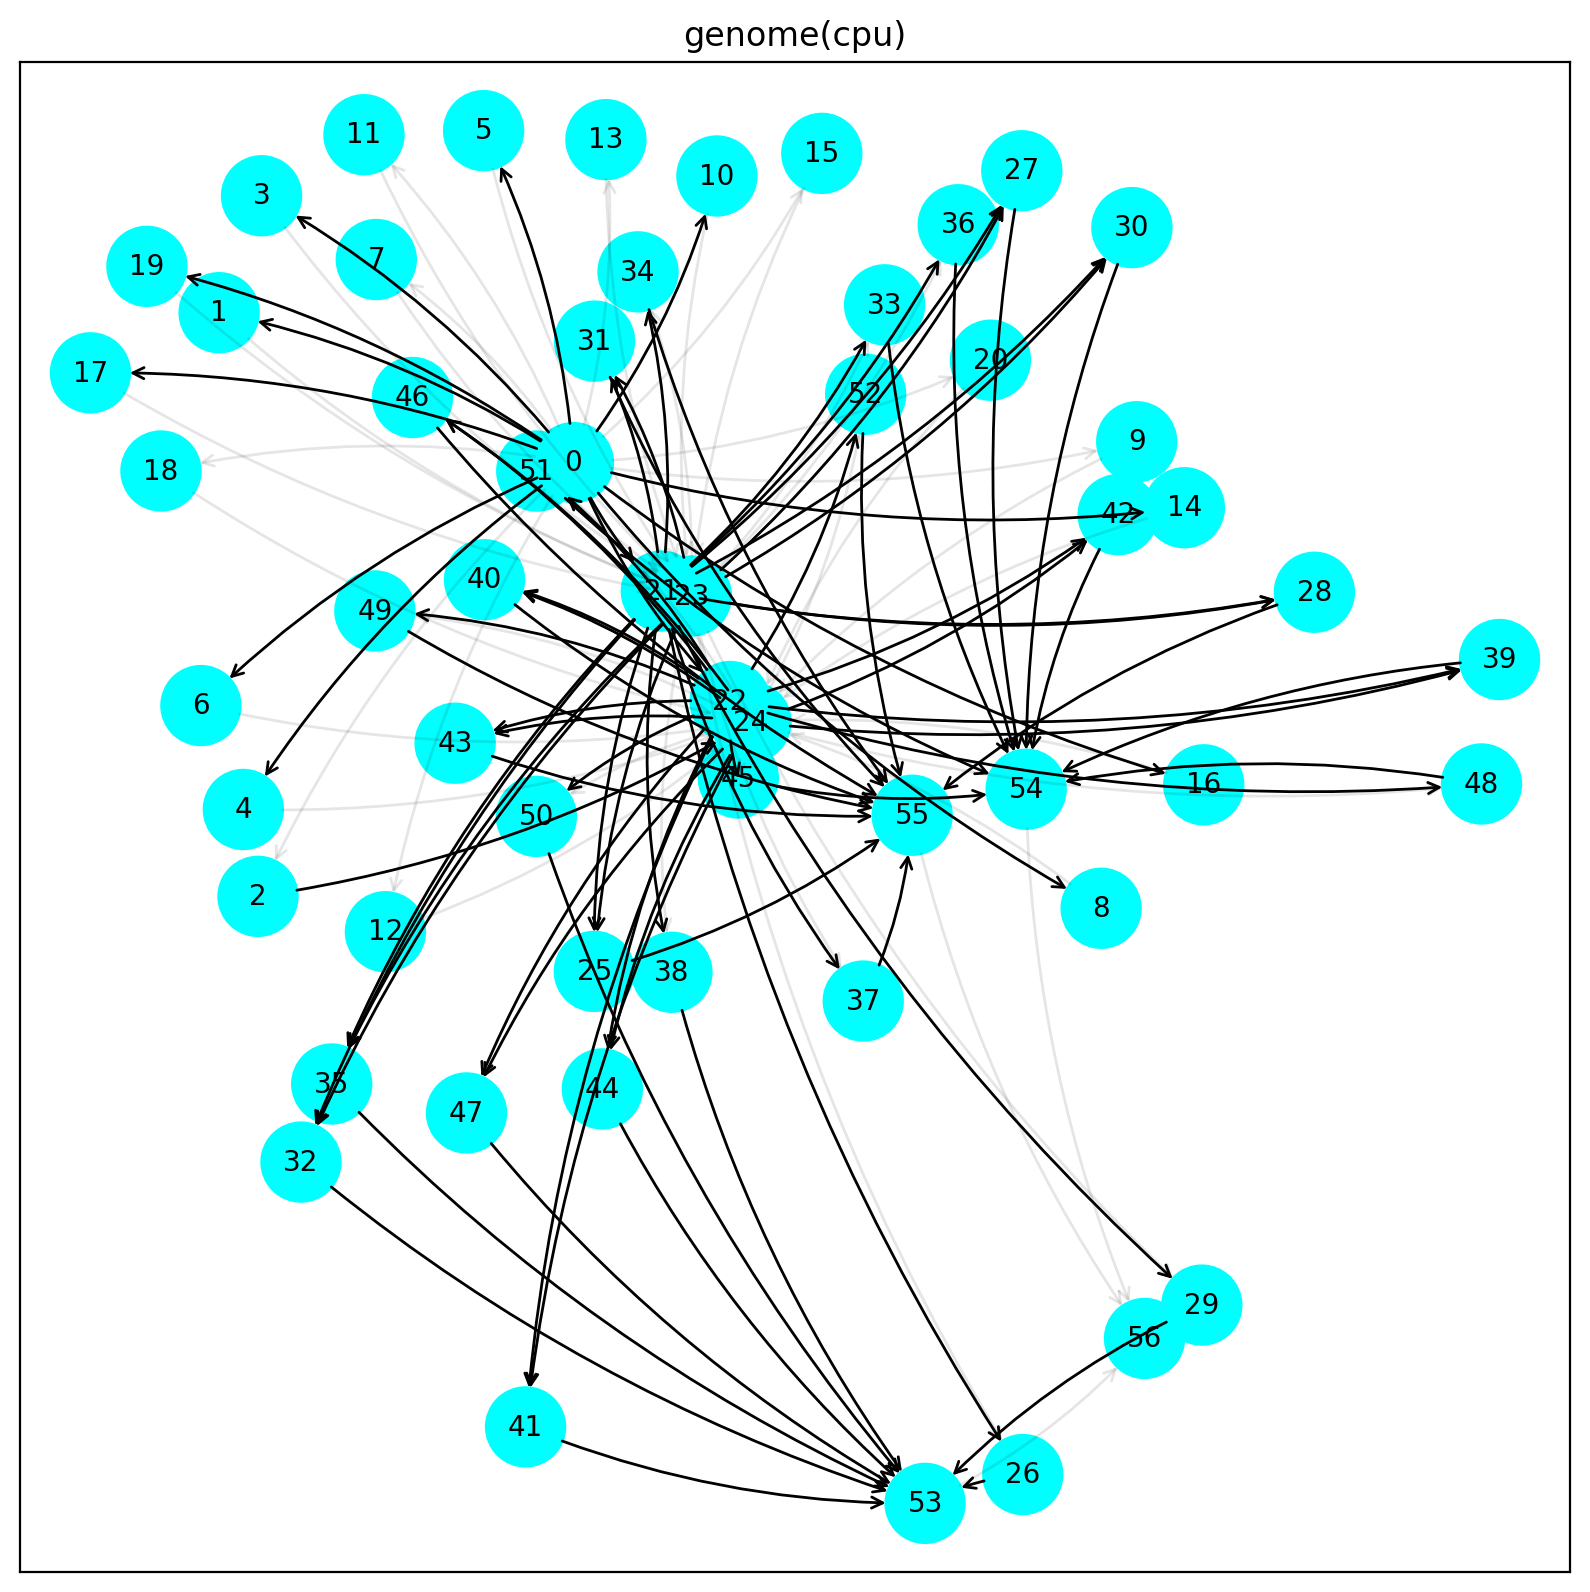

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 289.25it/s]


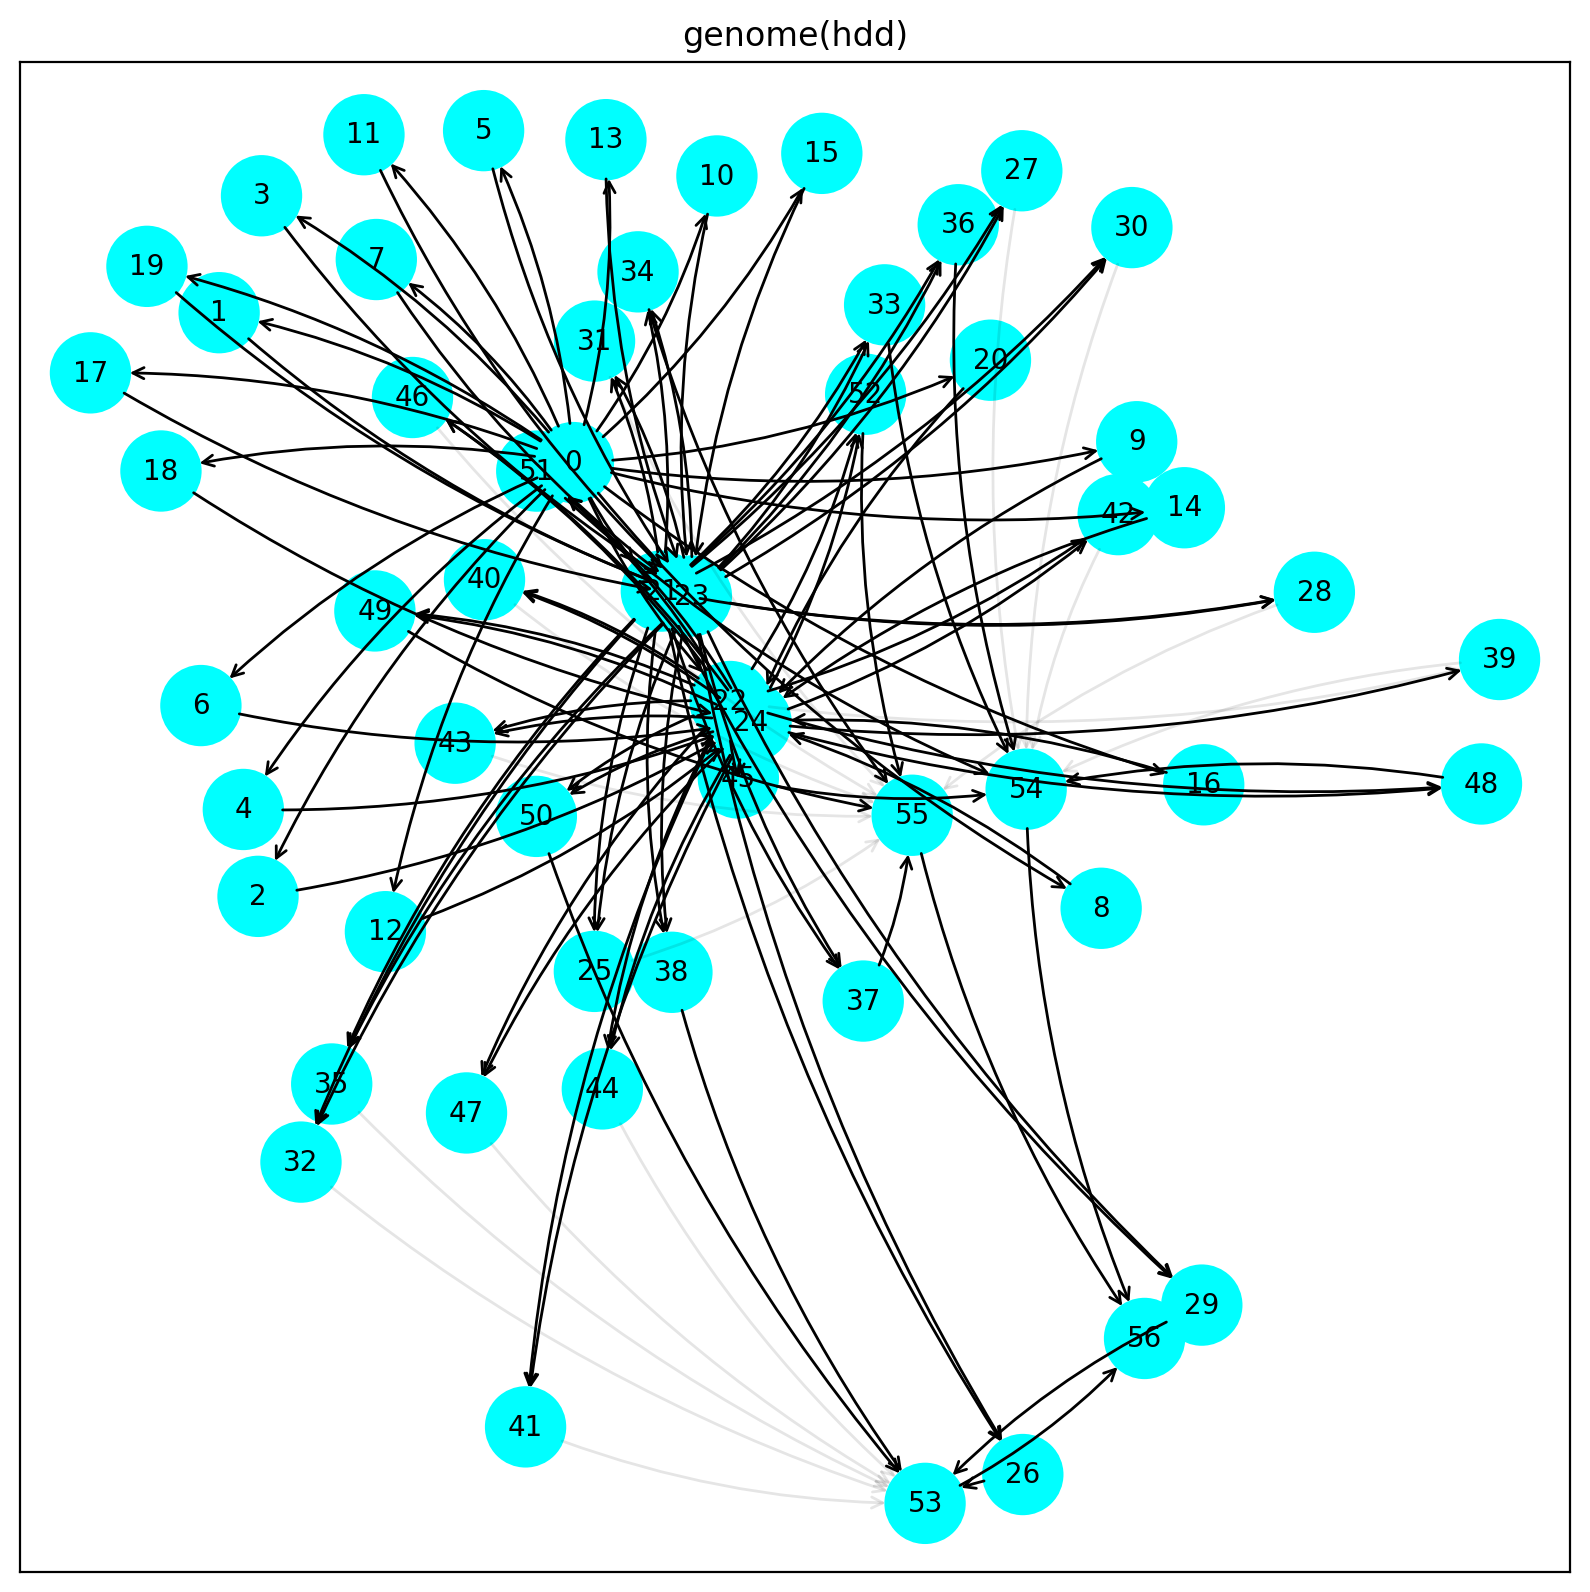

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 247.01it/s]


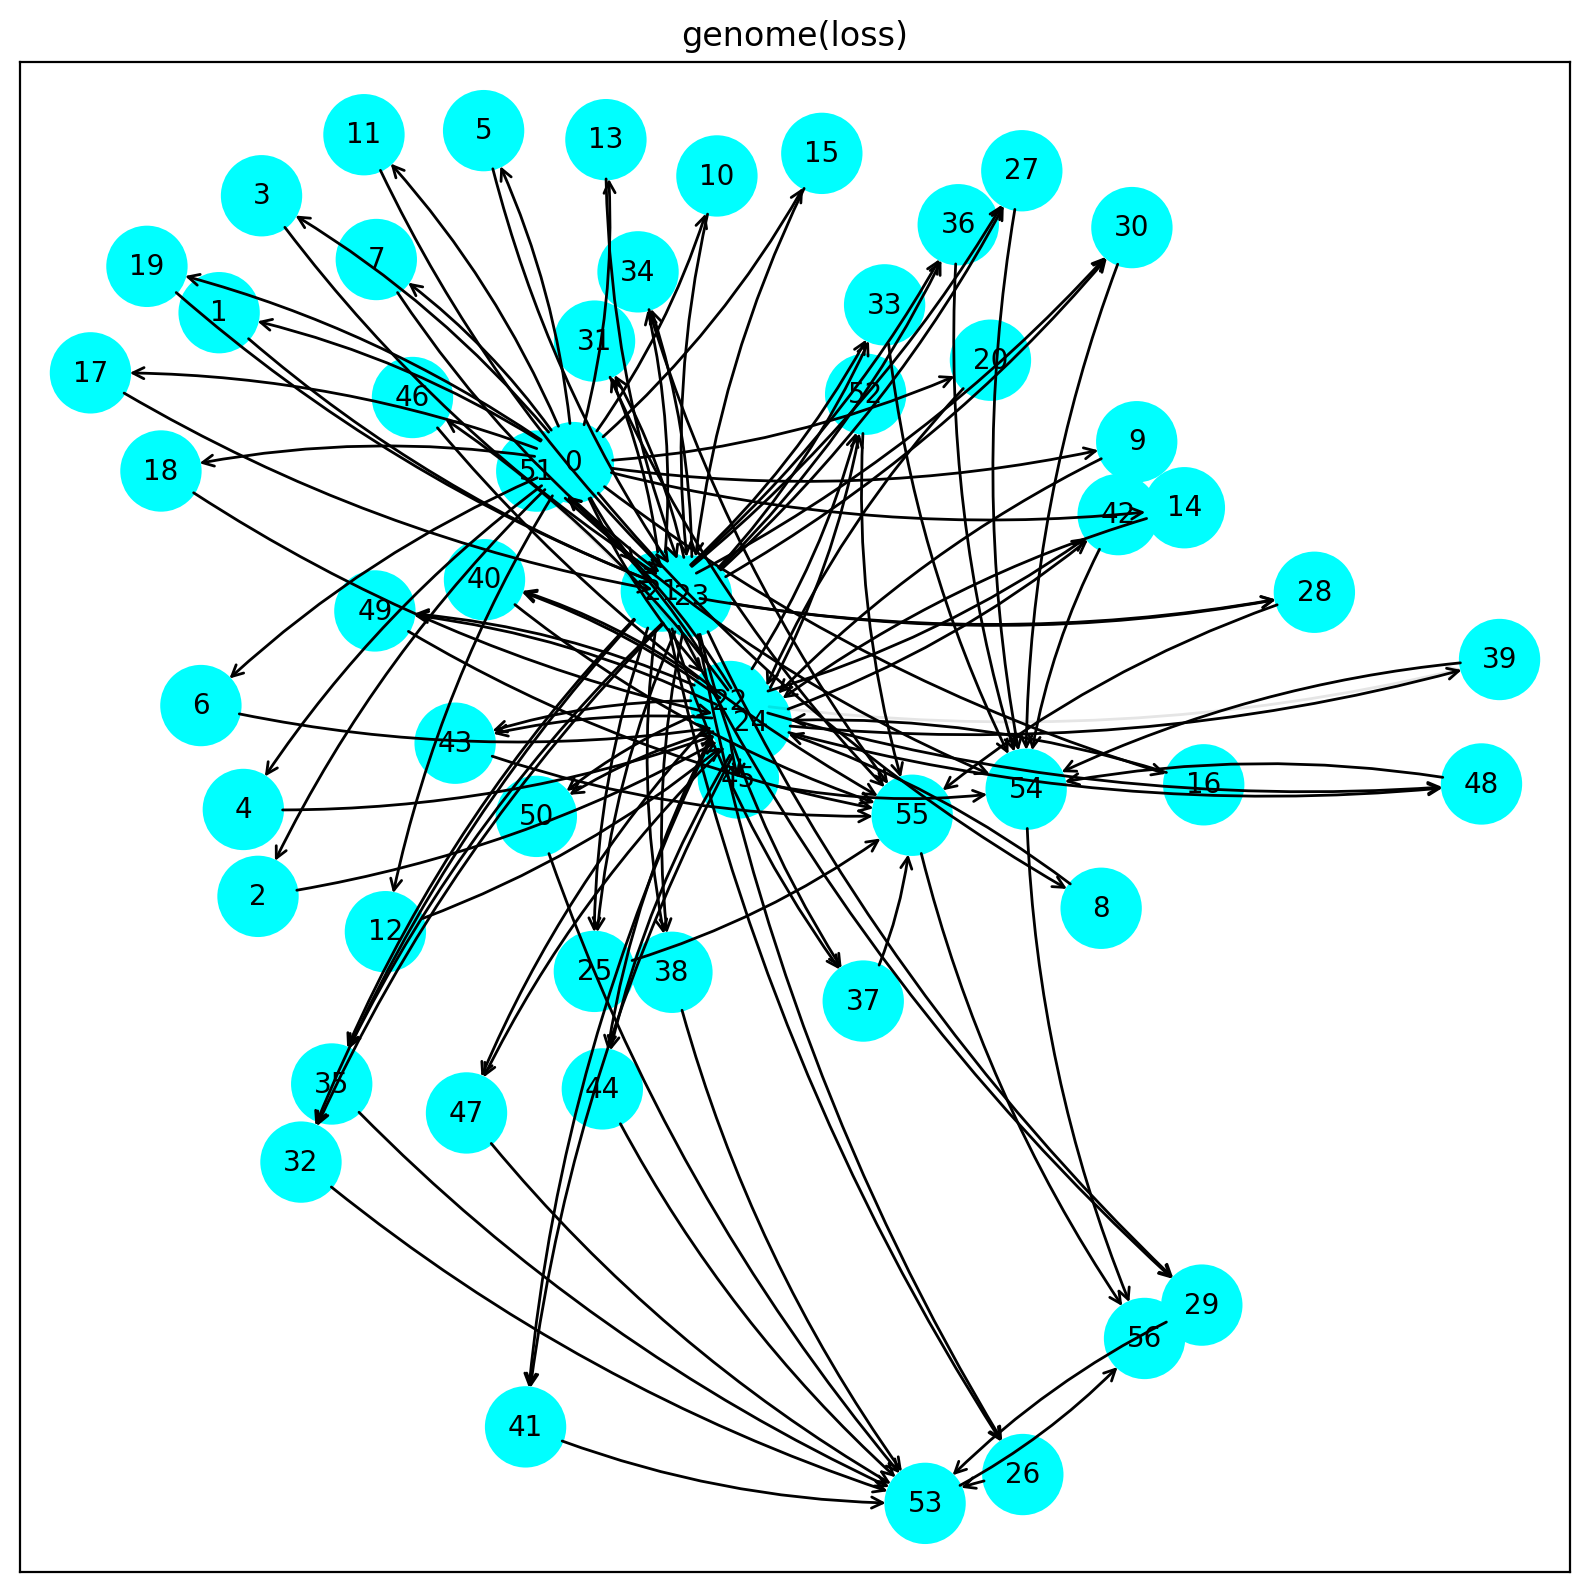

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 250.48it/s]


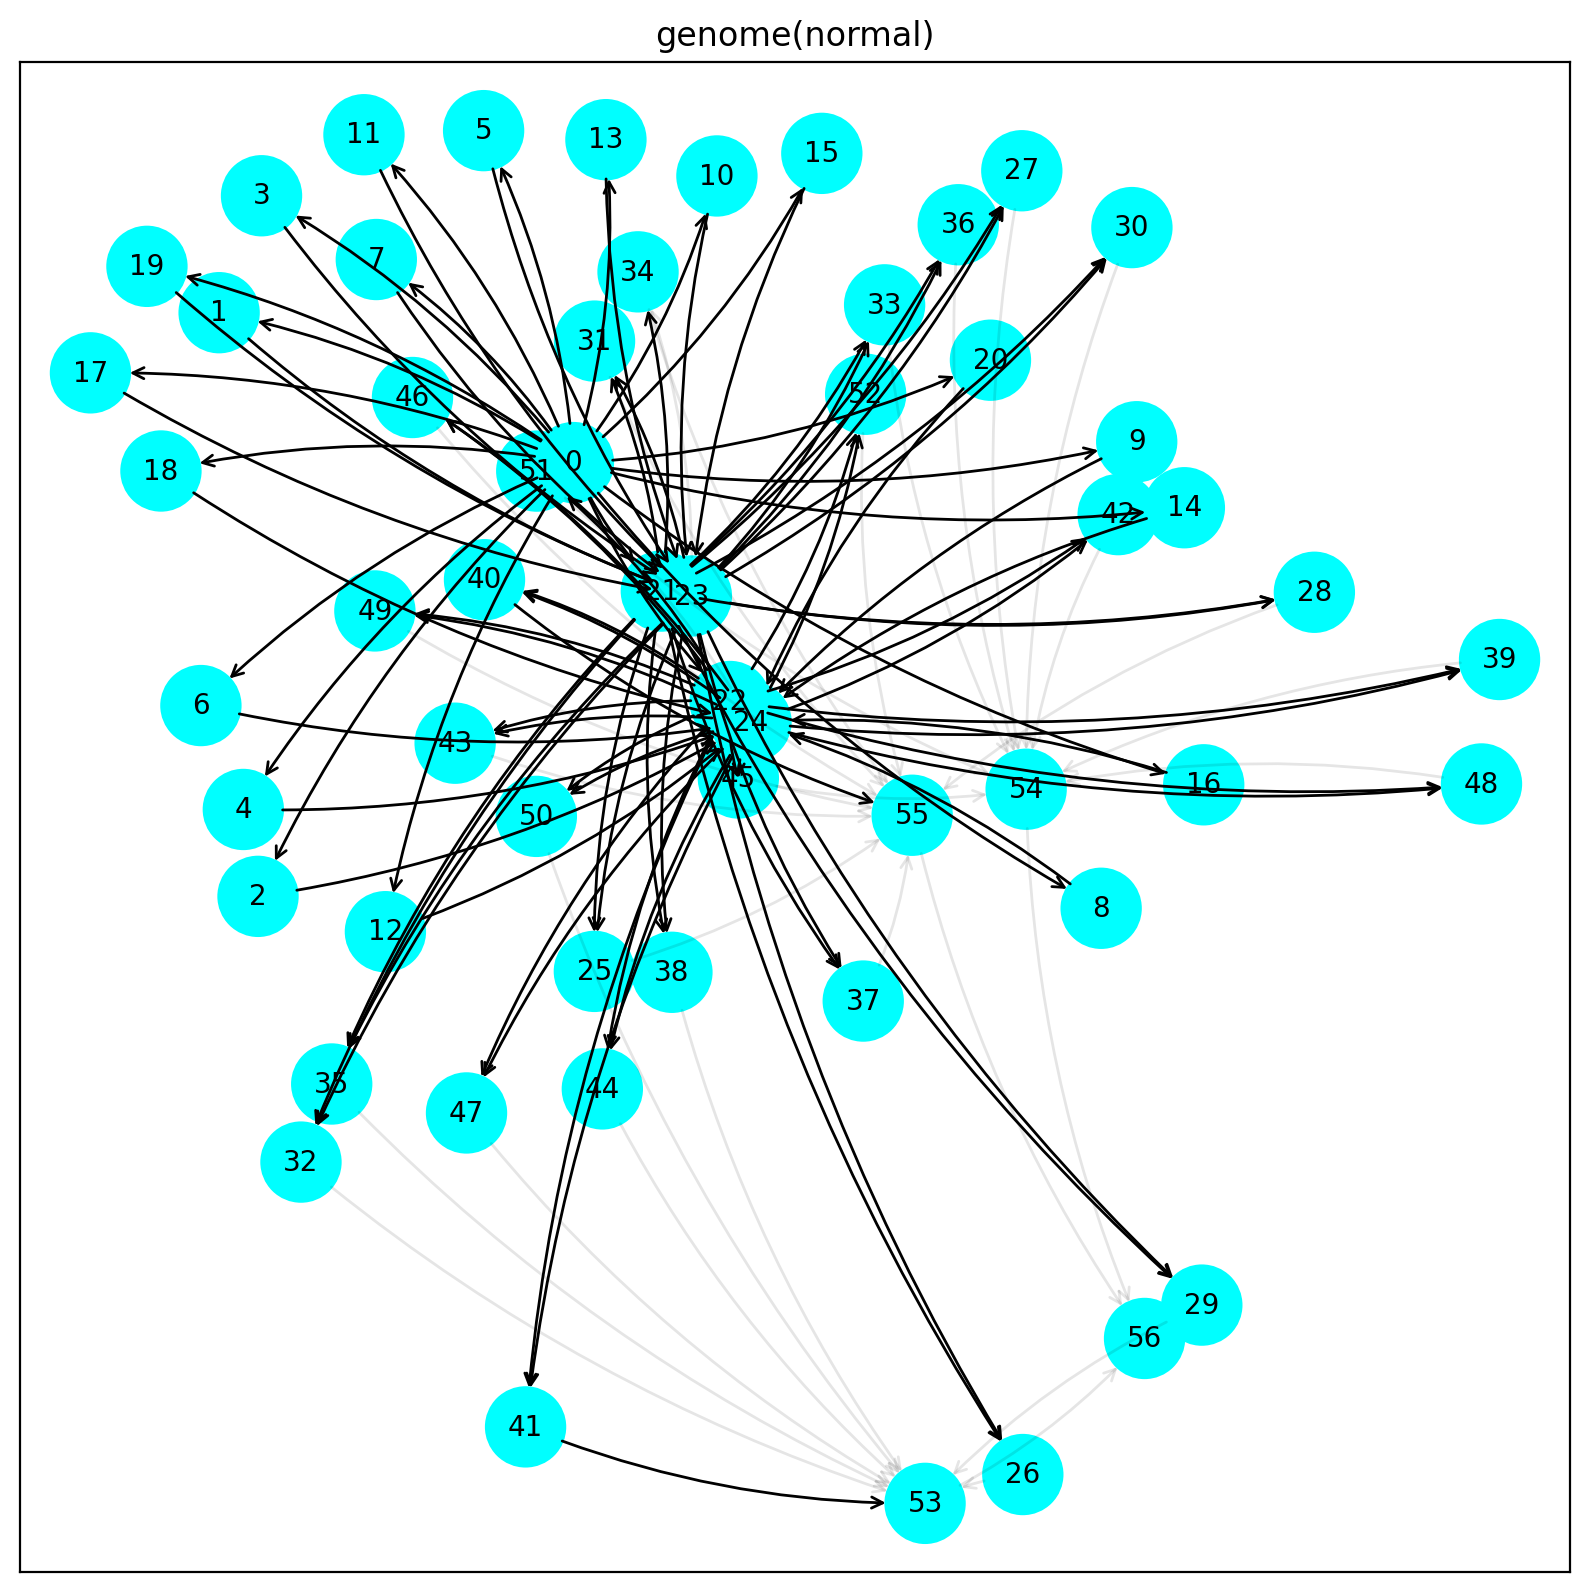

In [3]:
explain_mod('genome', data_read=1)

WF nowcluster_16 
 Acc: 0.640650406504065


Explain graph: 100%|██████████| 200/200 [00:00<00:00, 289.20it/s]


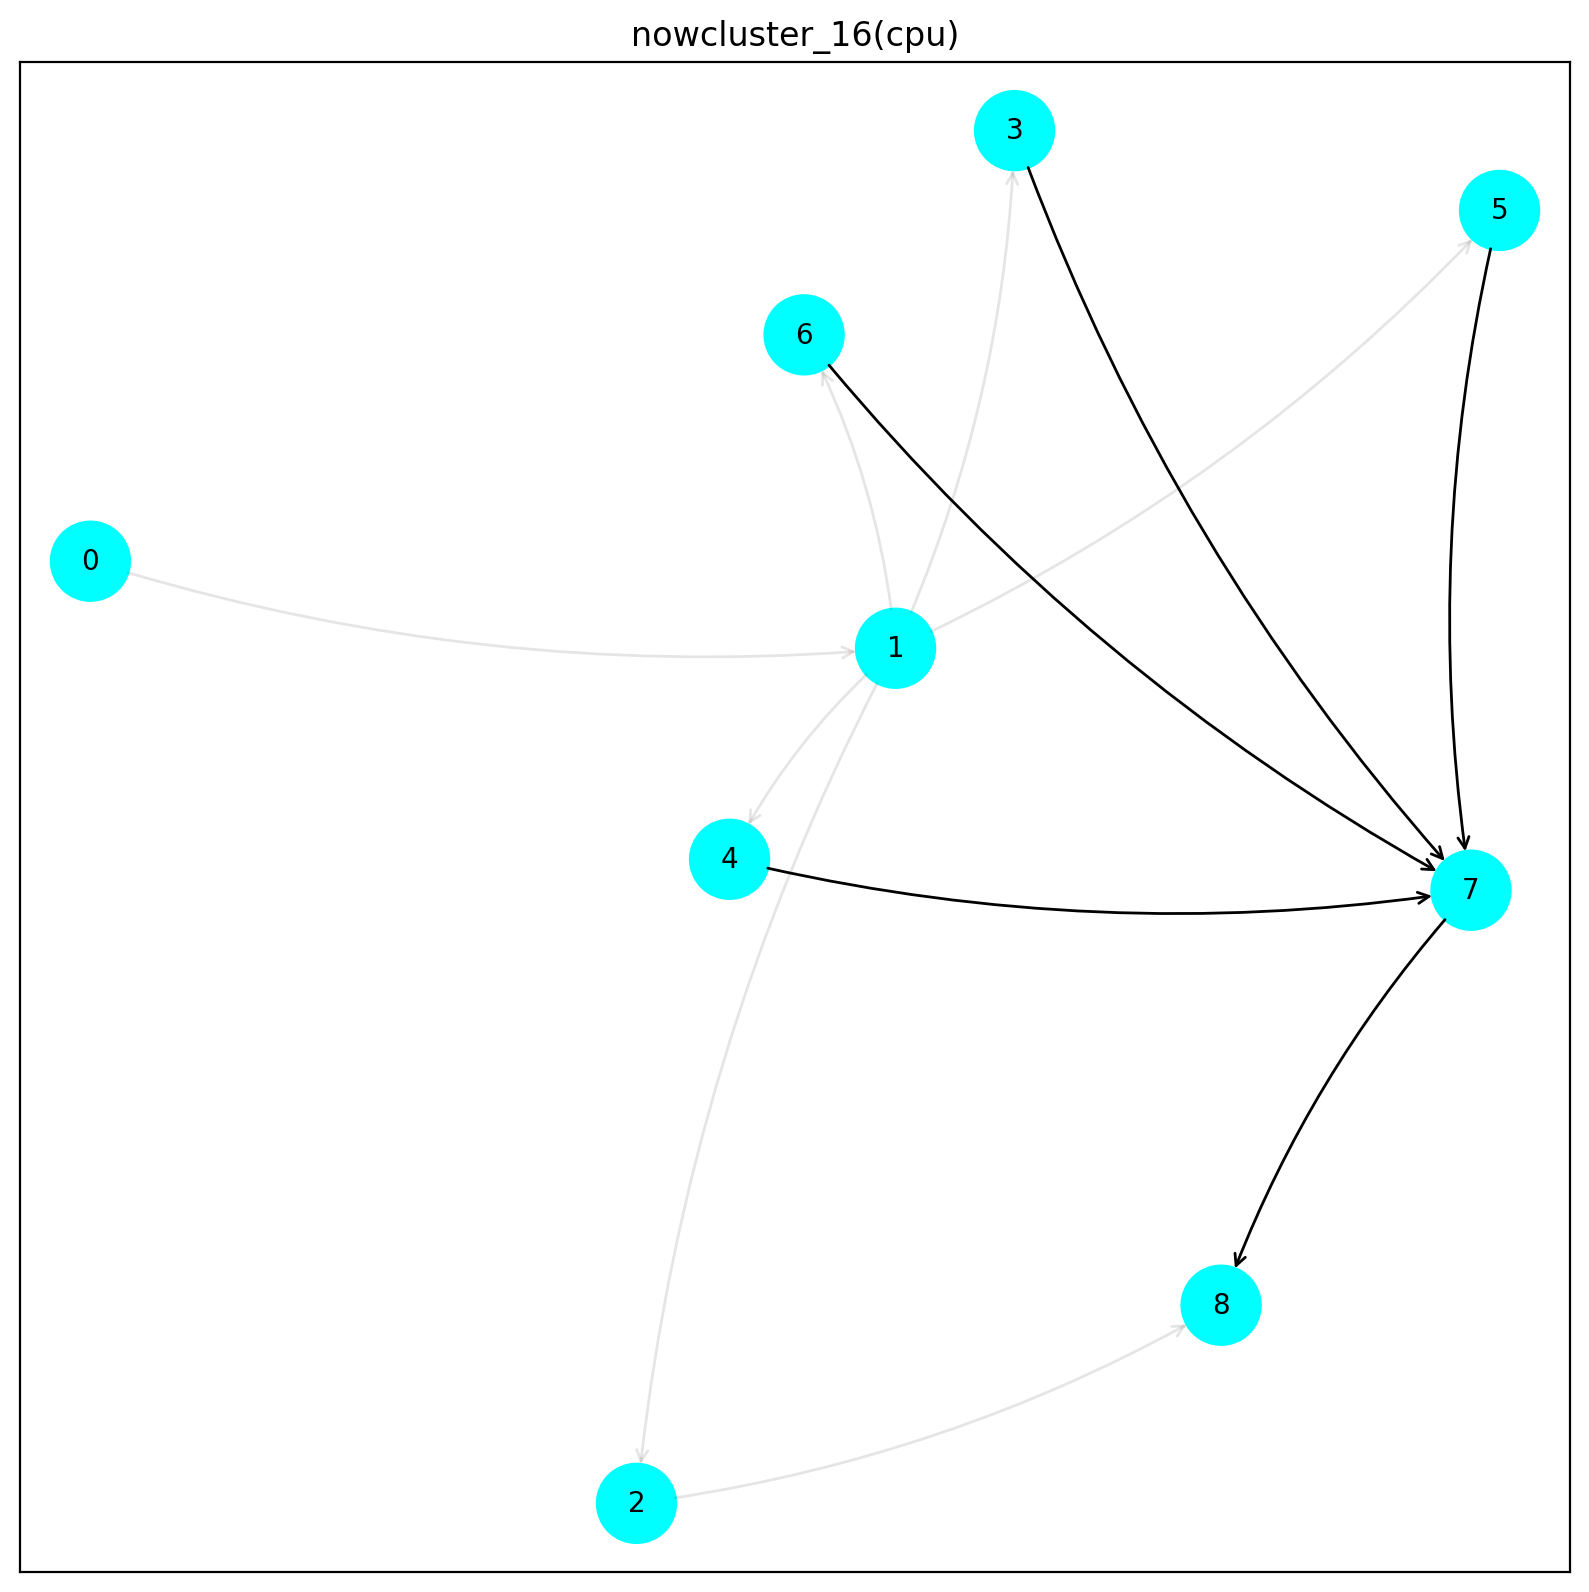

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 273.56it/s]


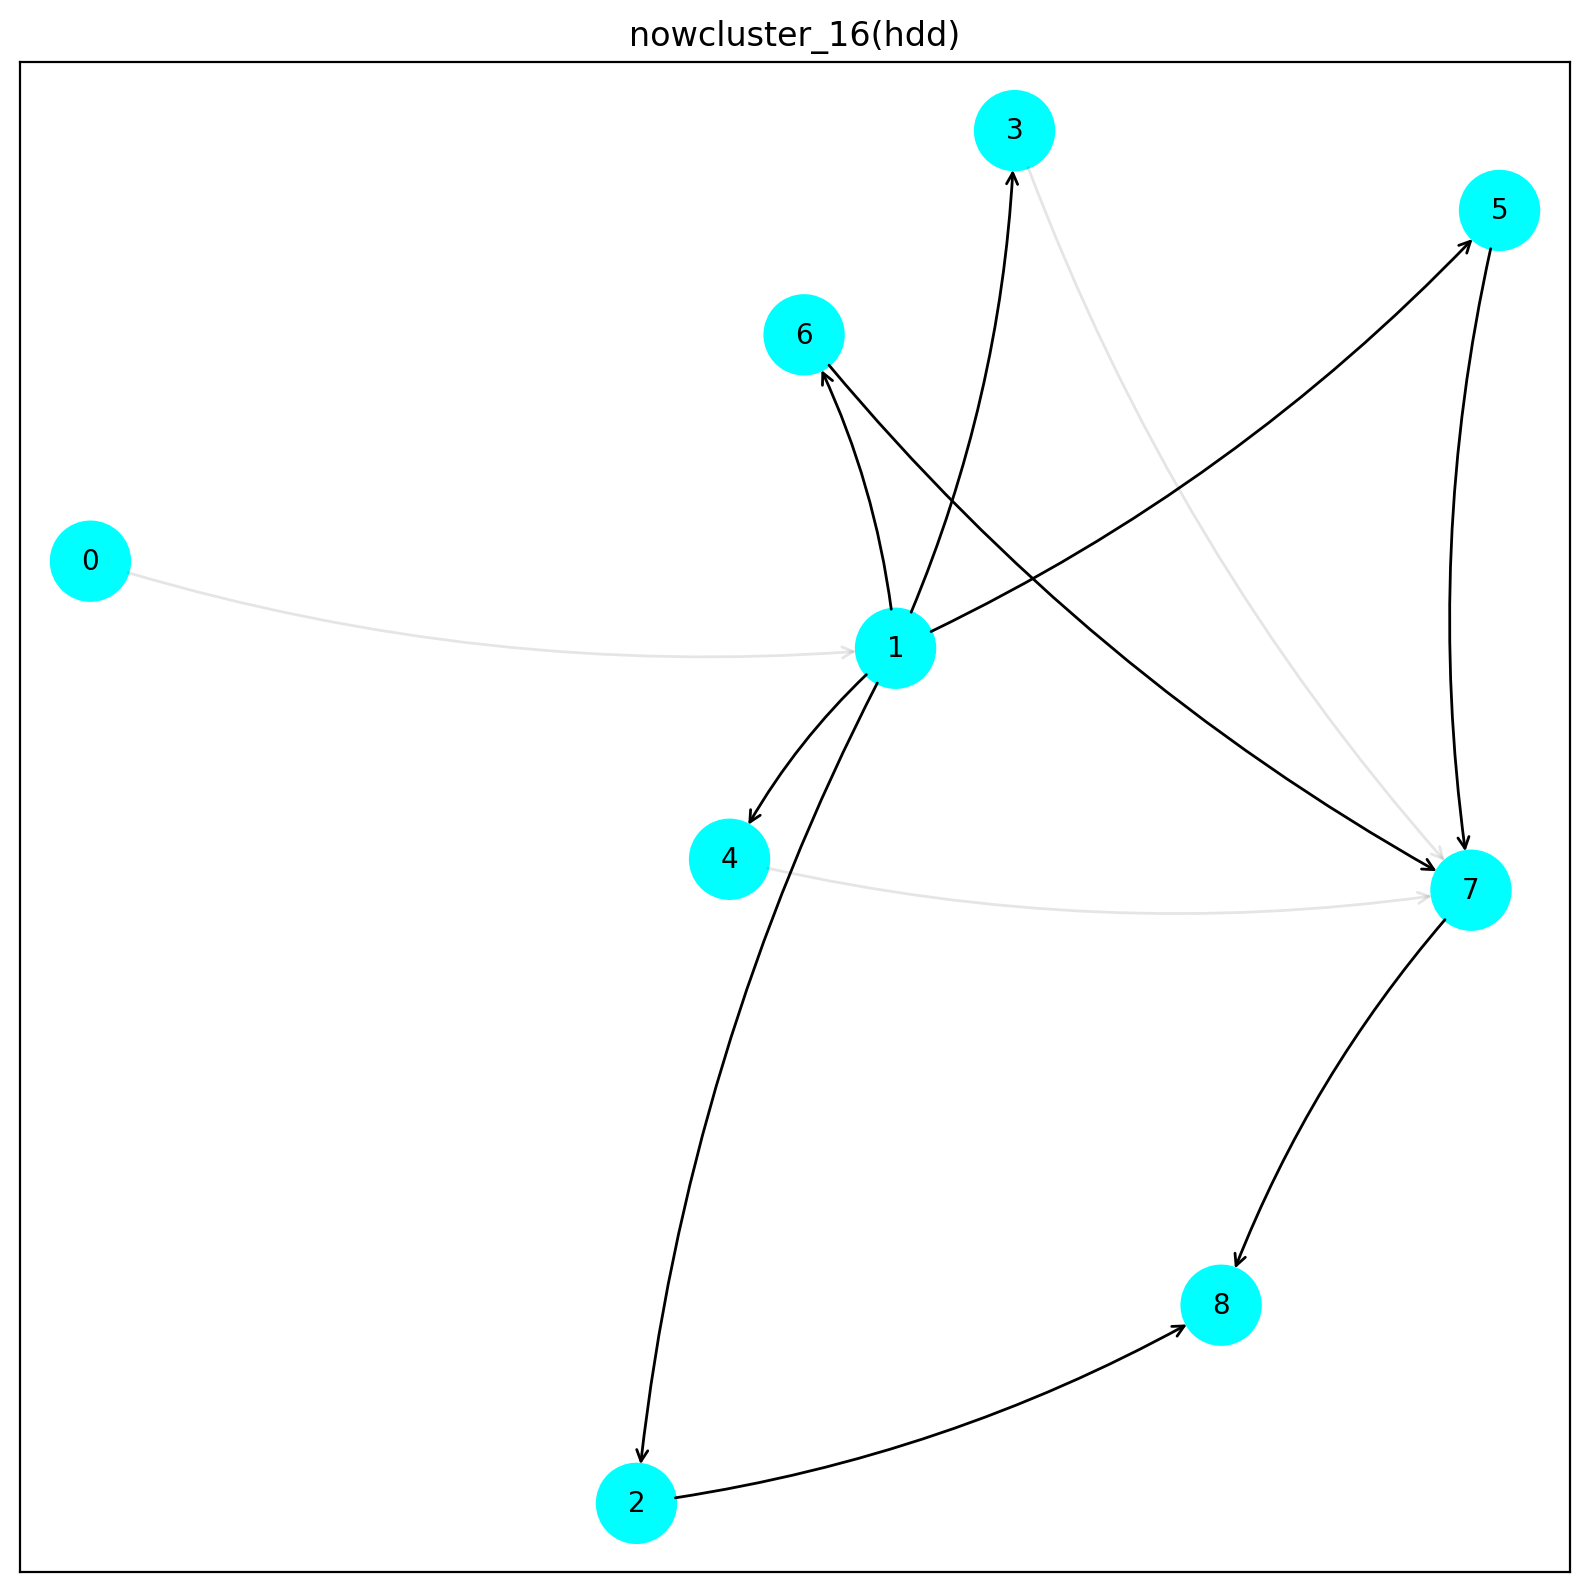

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 255.92it/s]


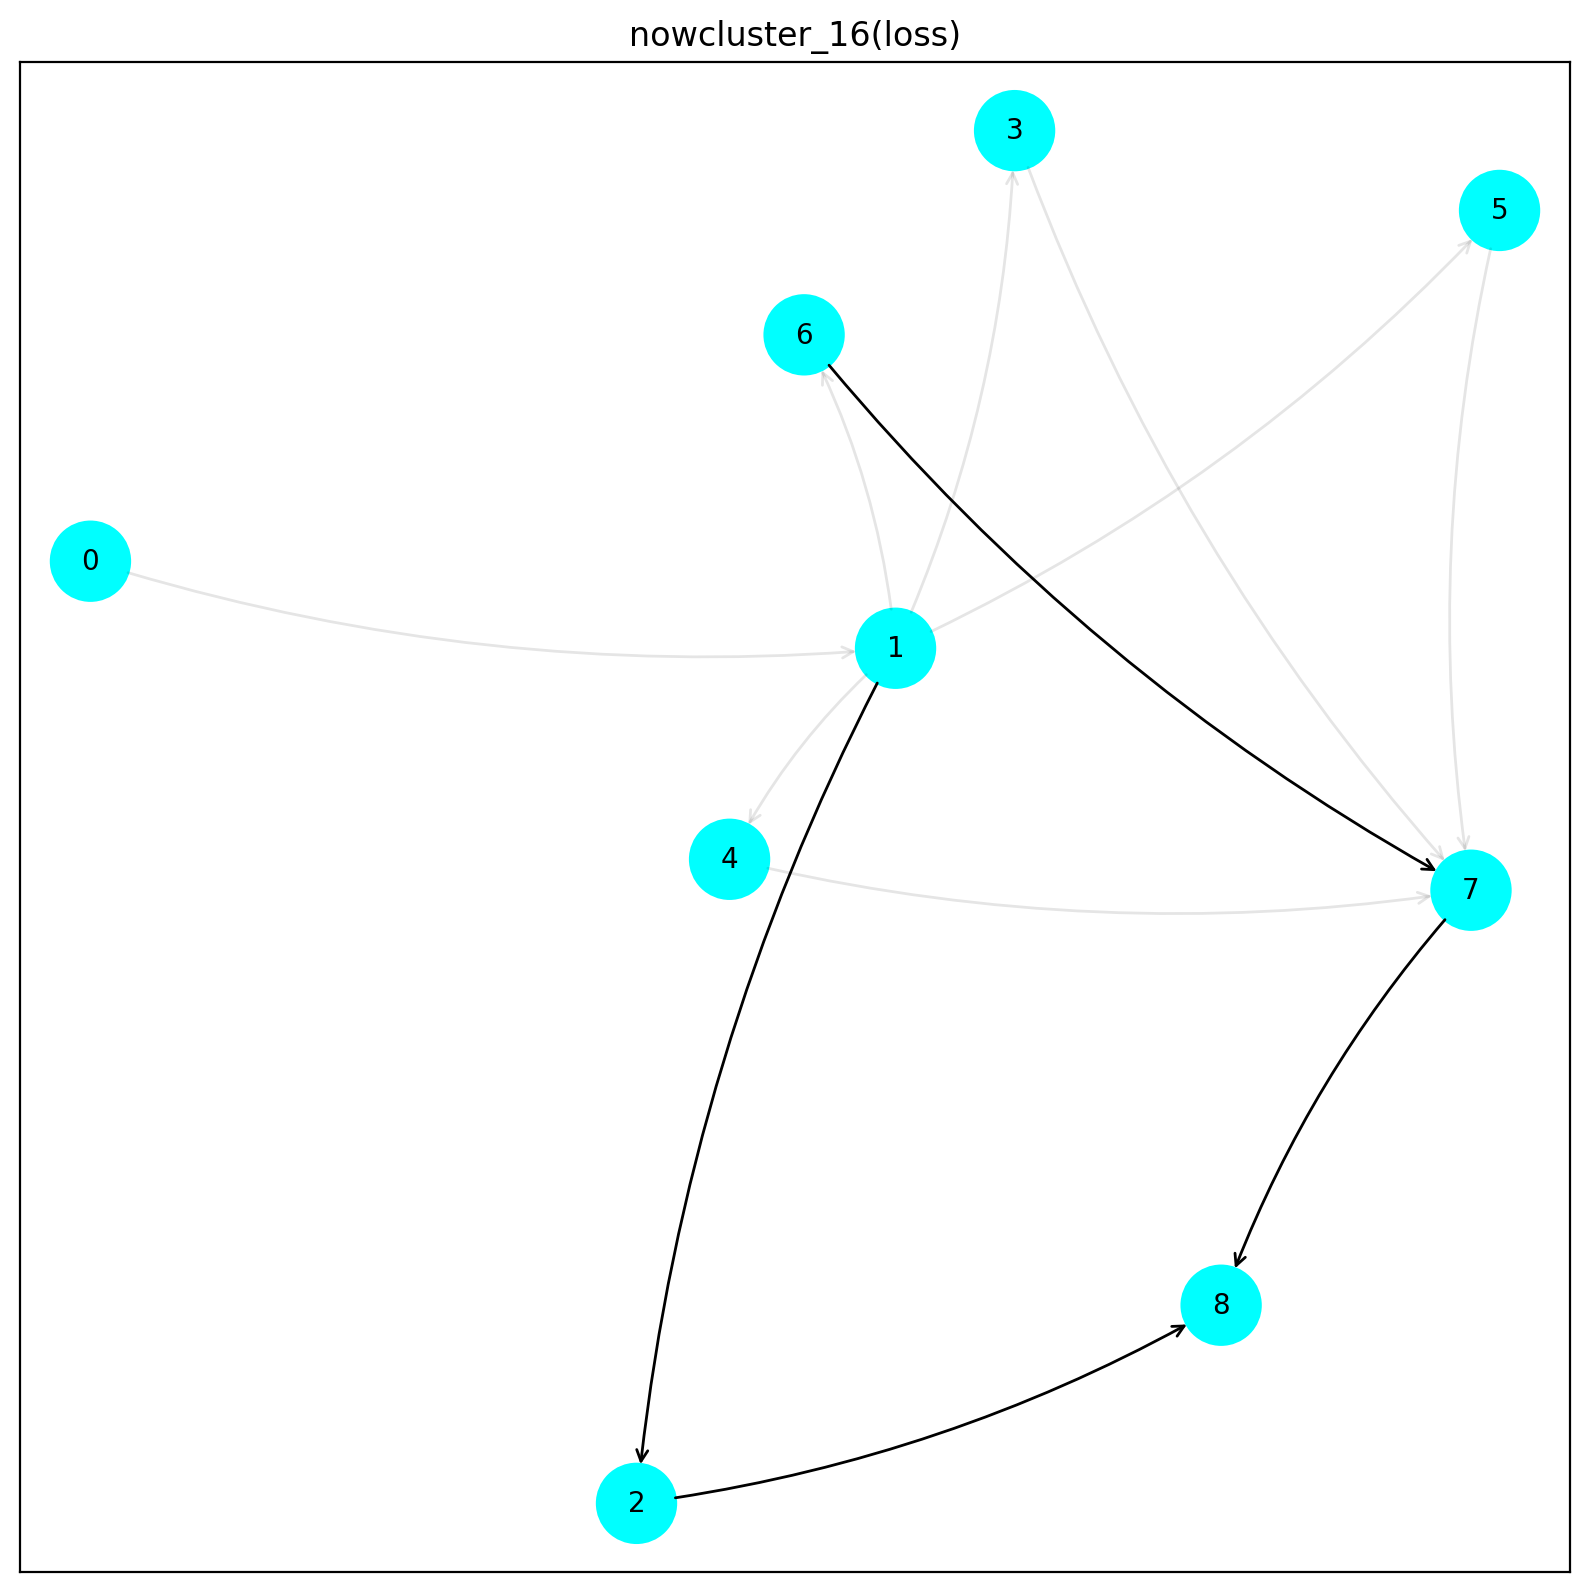

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 255.45it/s]


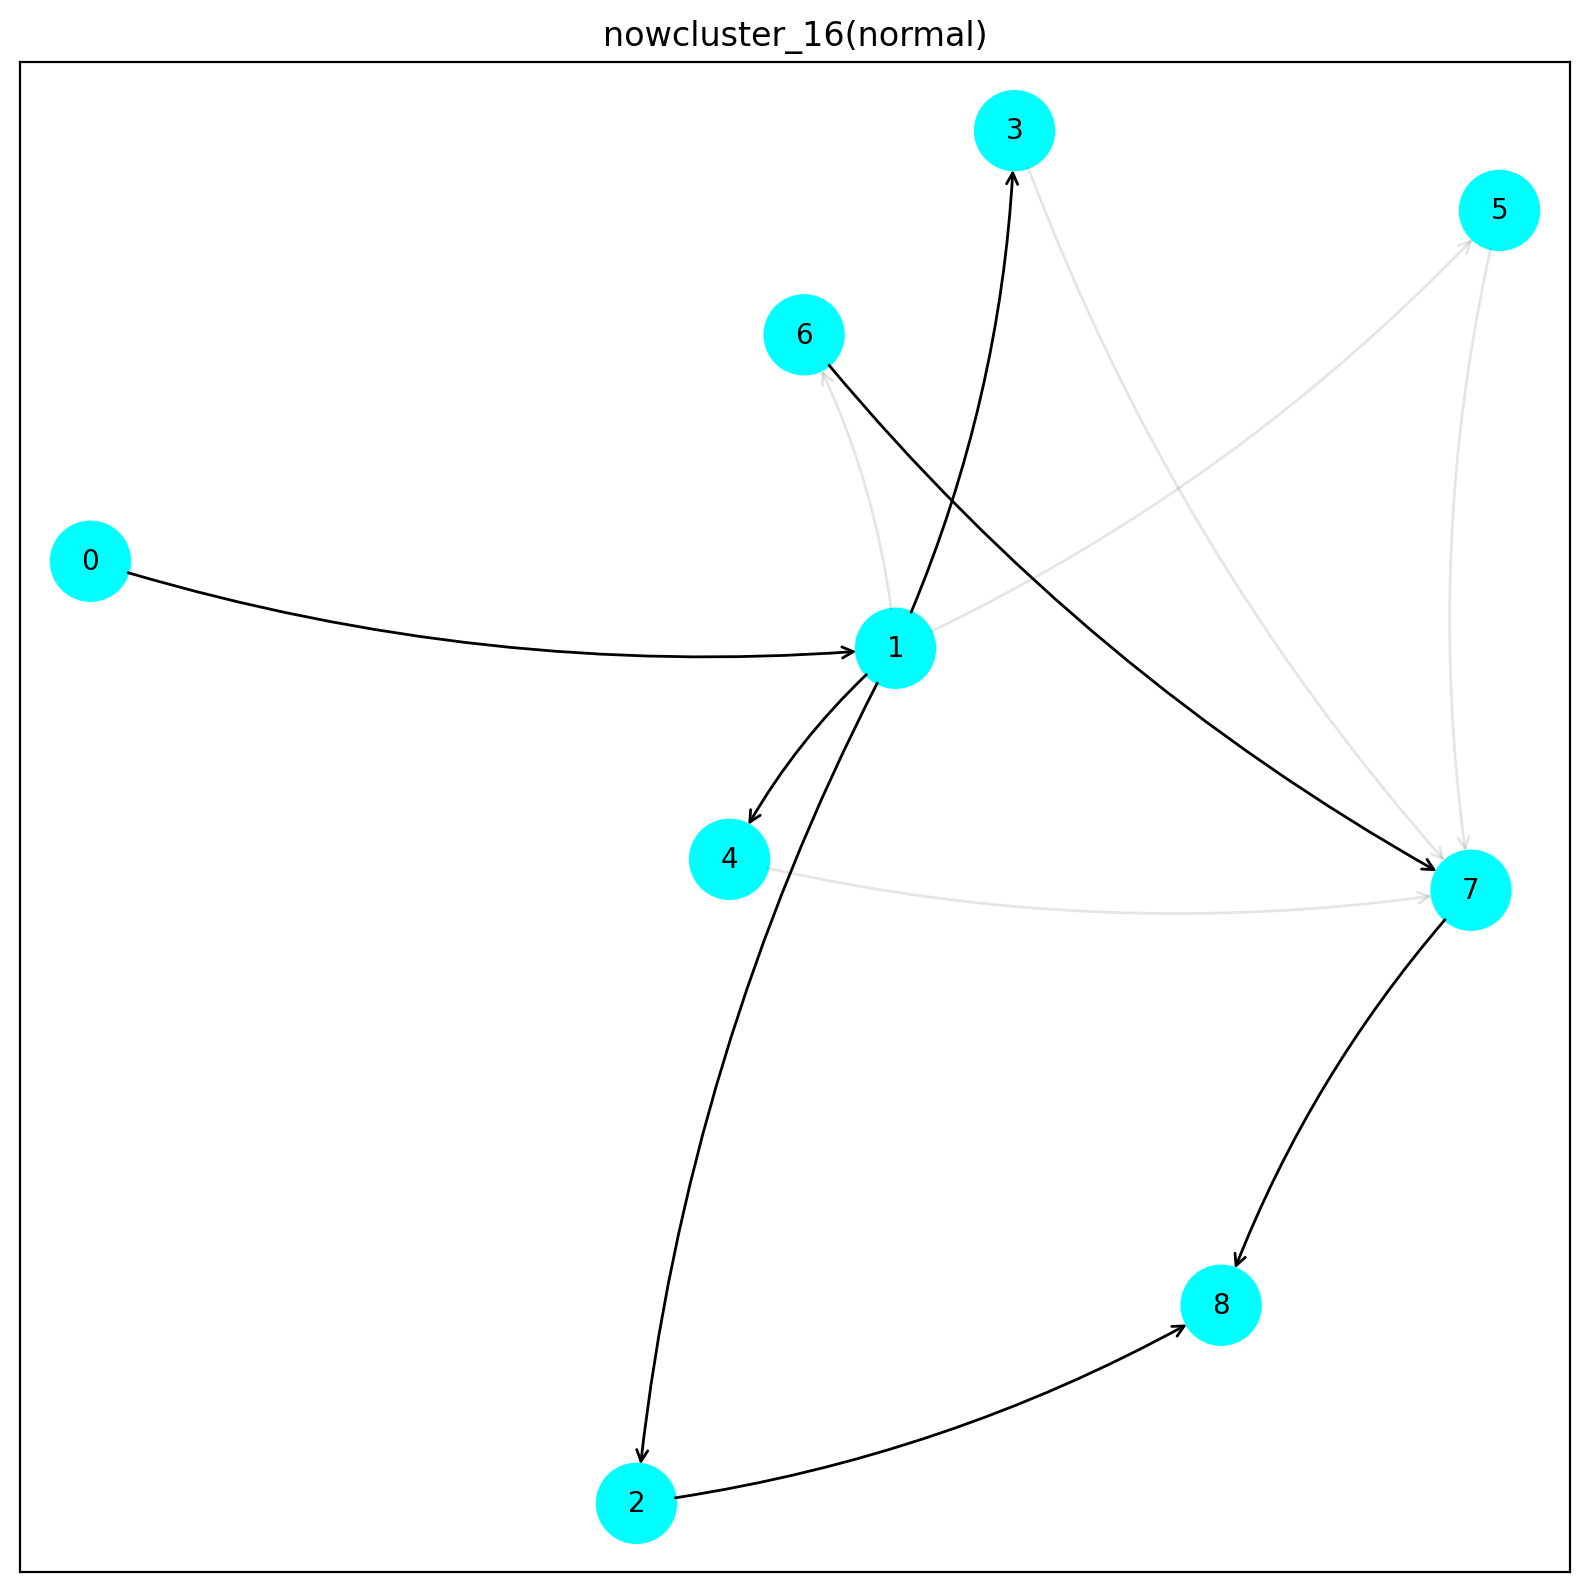

In [4]:
explain_mod('nowcluster_16', data_read=1)

WF casa_nowcast_8 
 Acc: 0.8390243902439024


Explain graph: 100%|██████████| 200/200 [00:00<00:00, 254.88it/s]


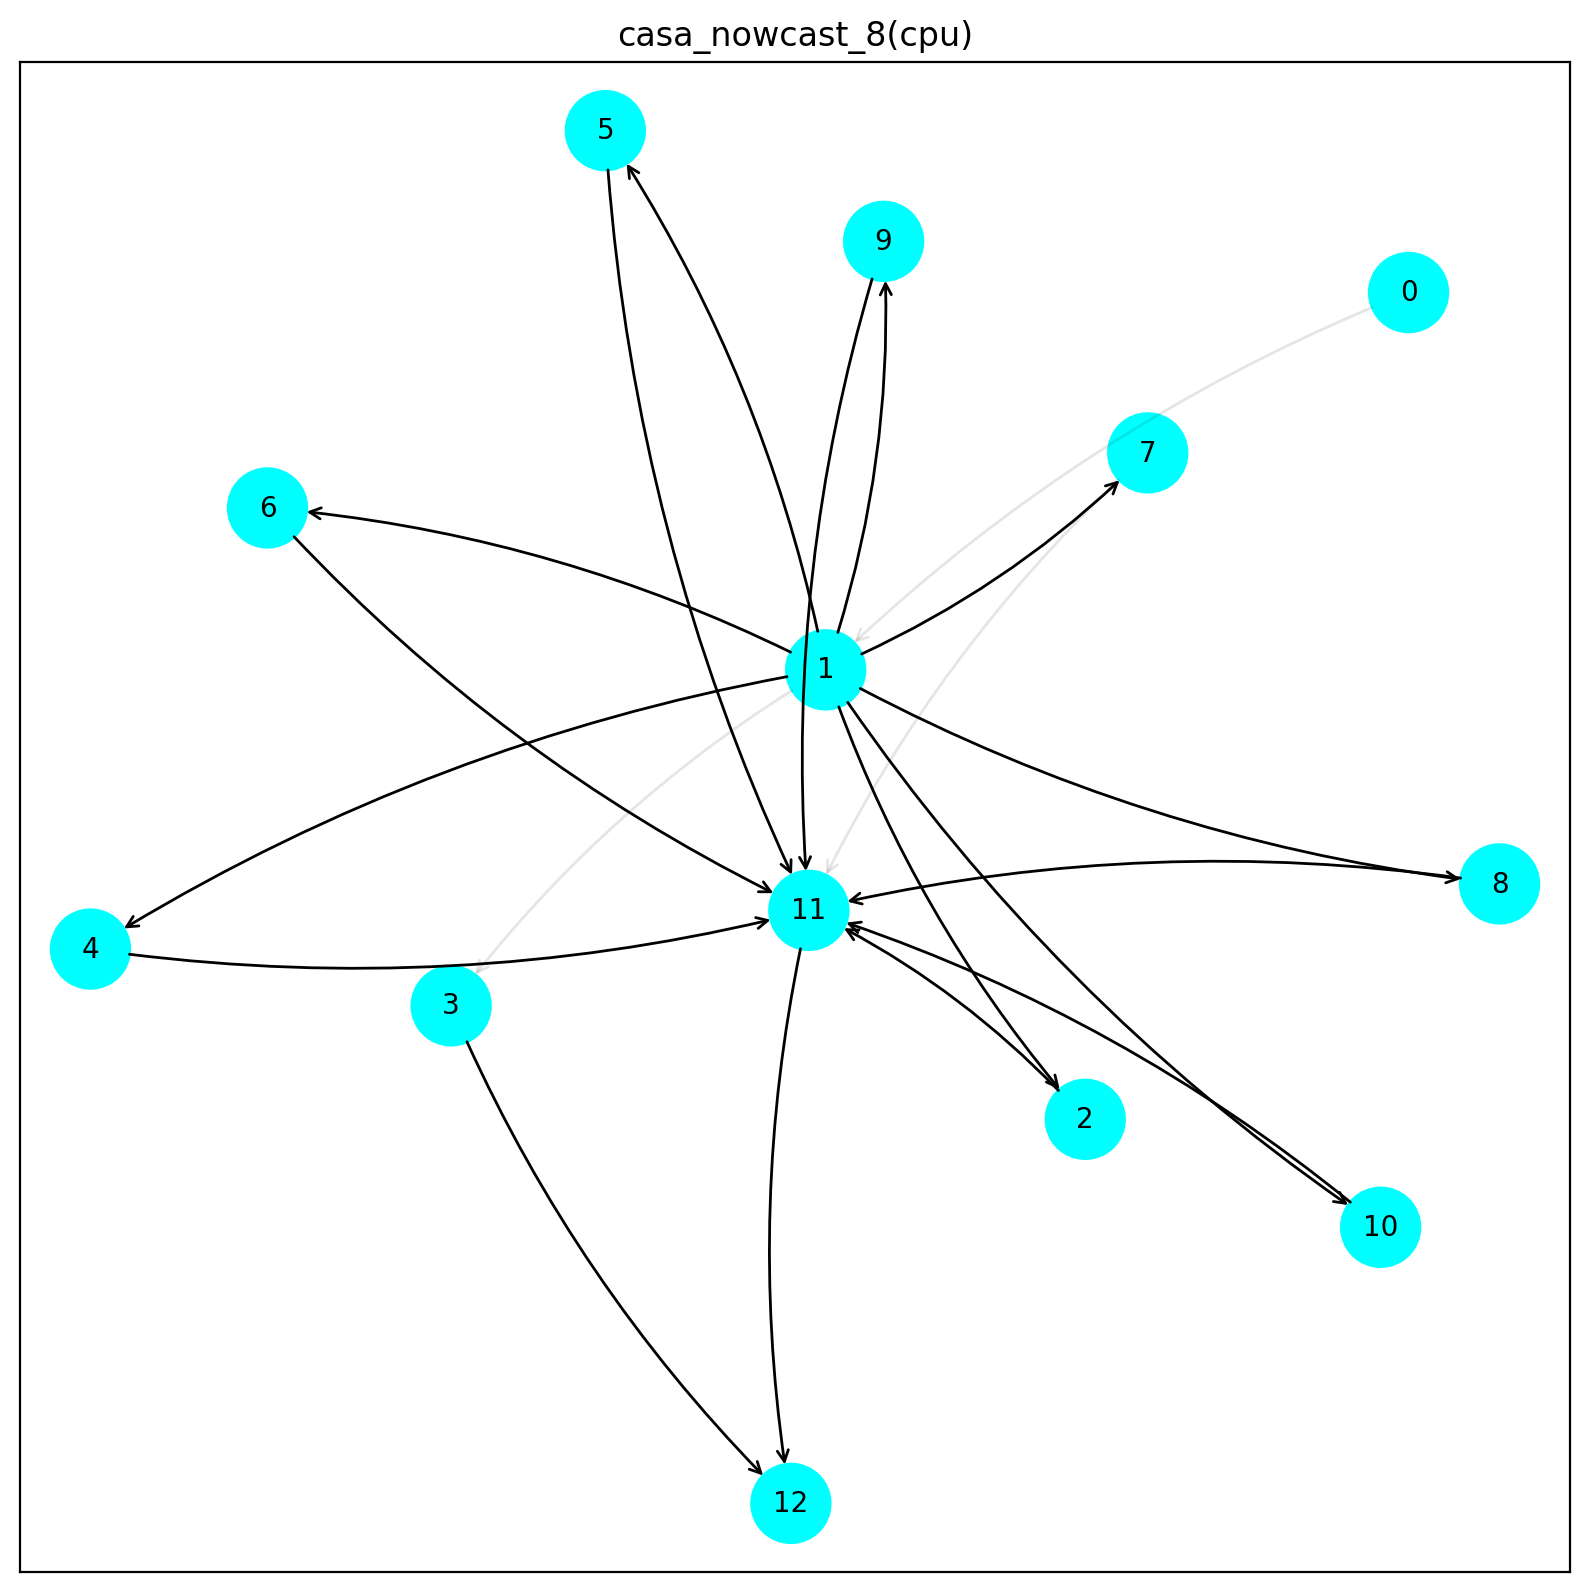

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 253.90it/s]


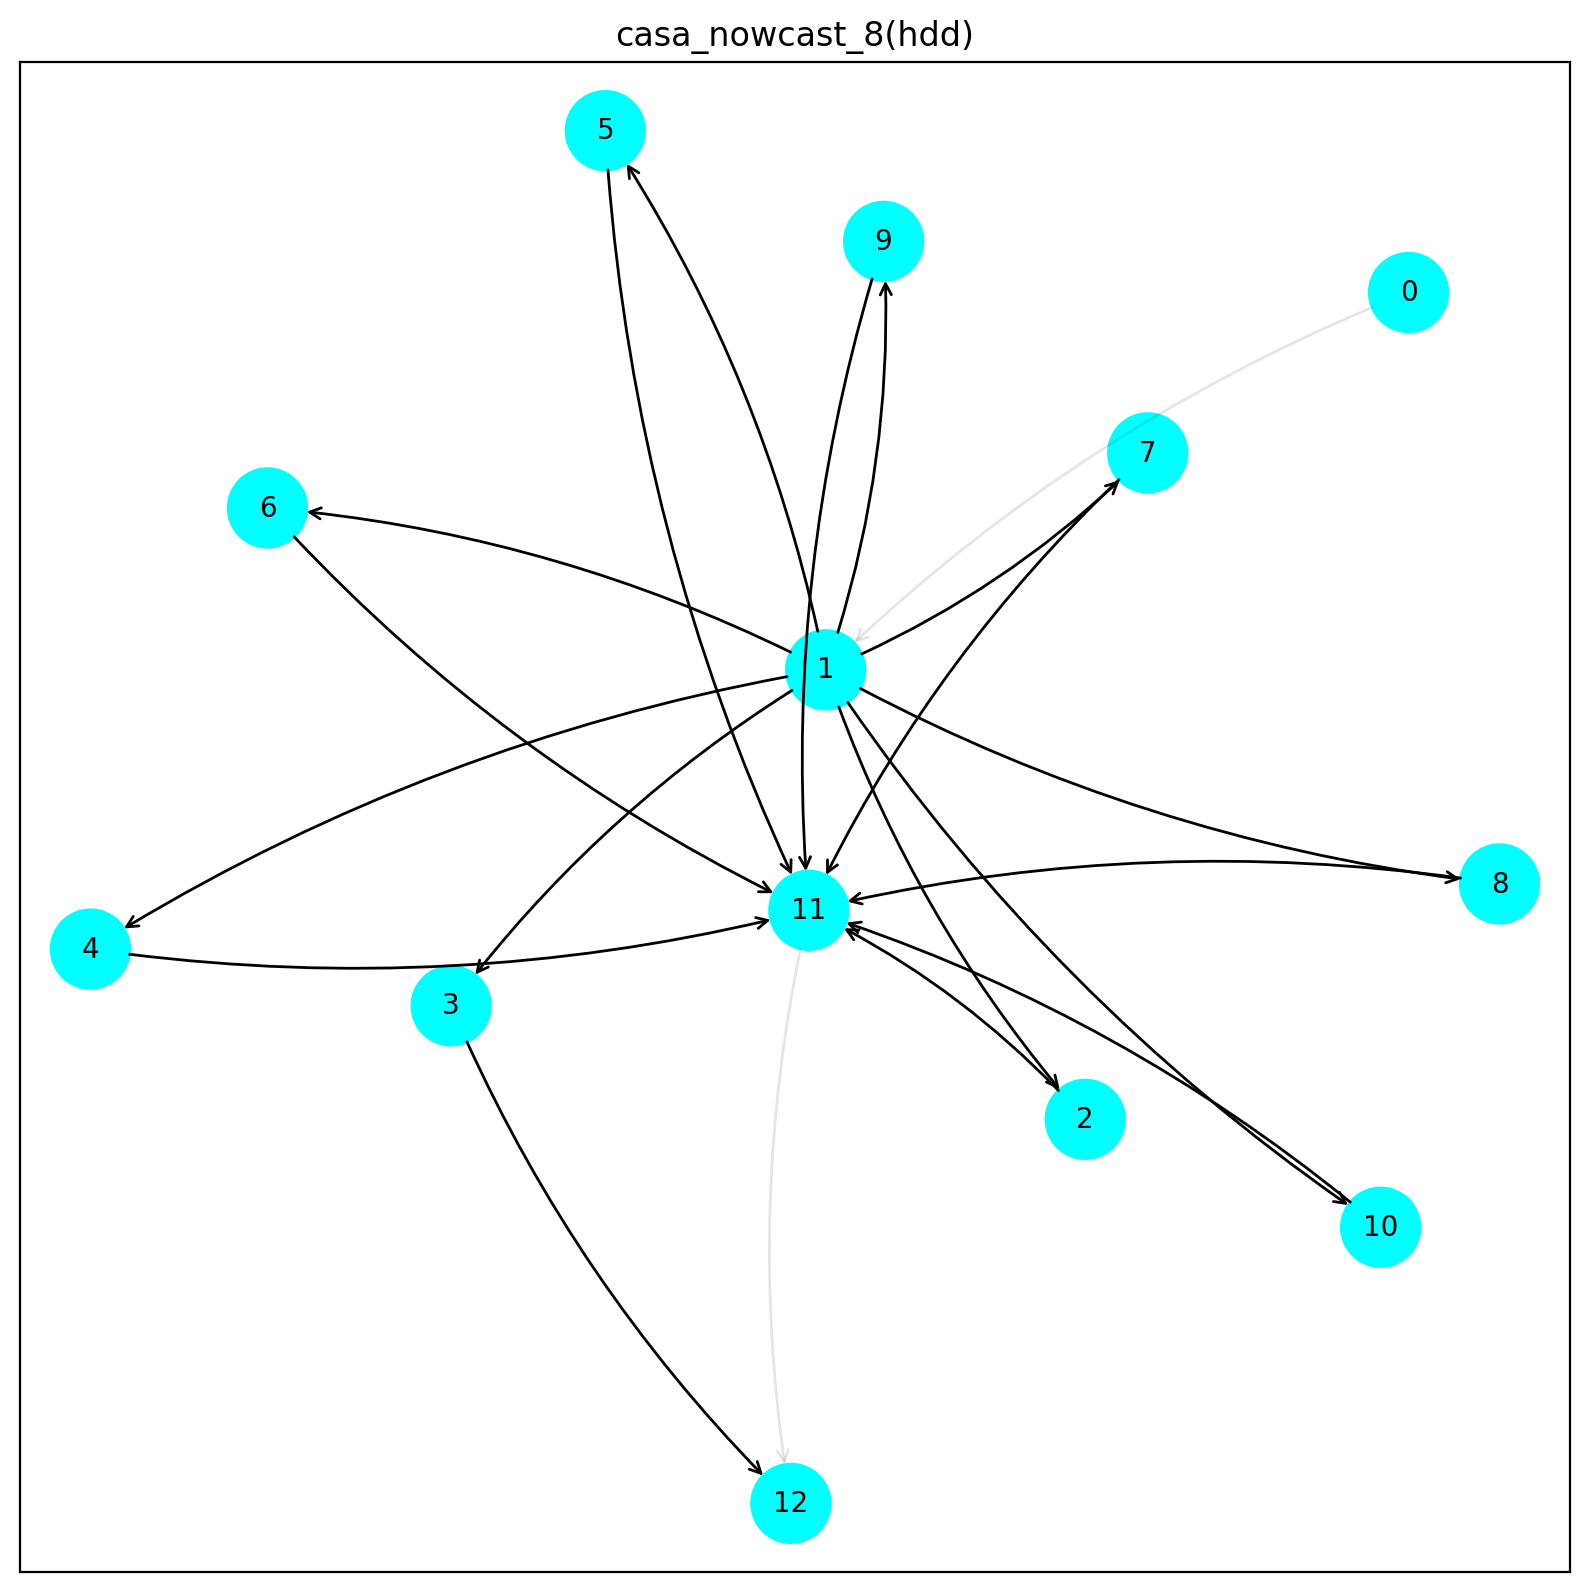

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 254.16it/s]


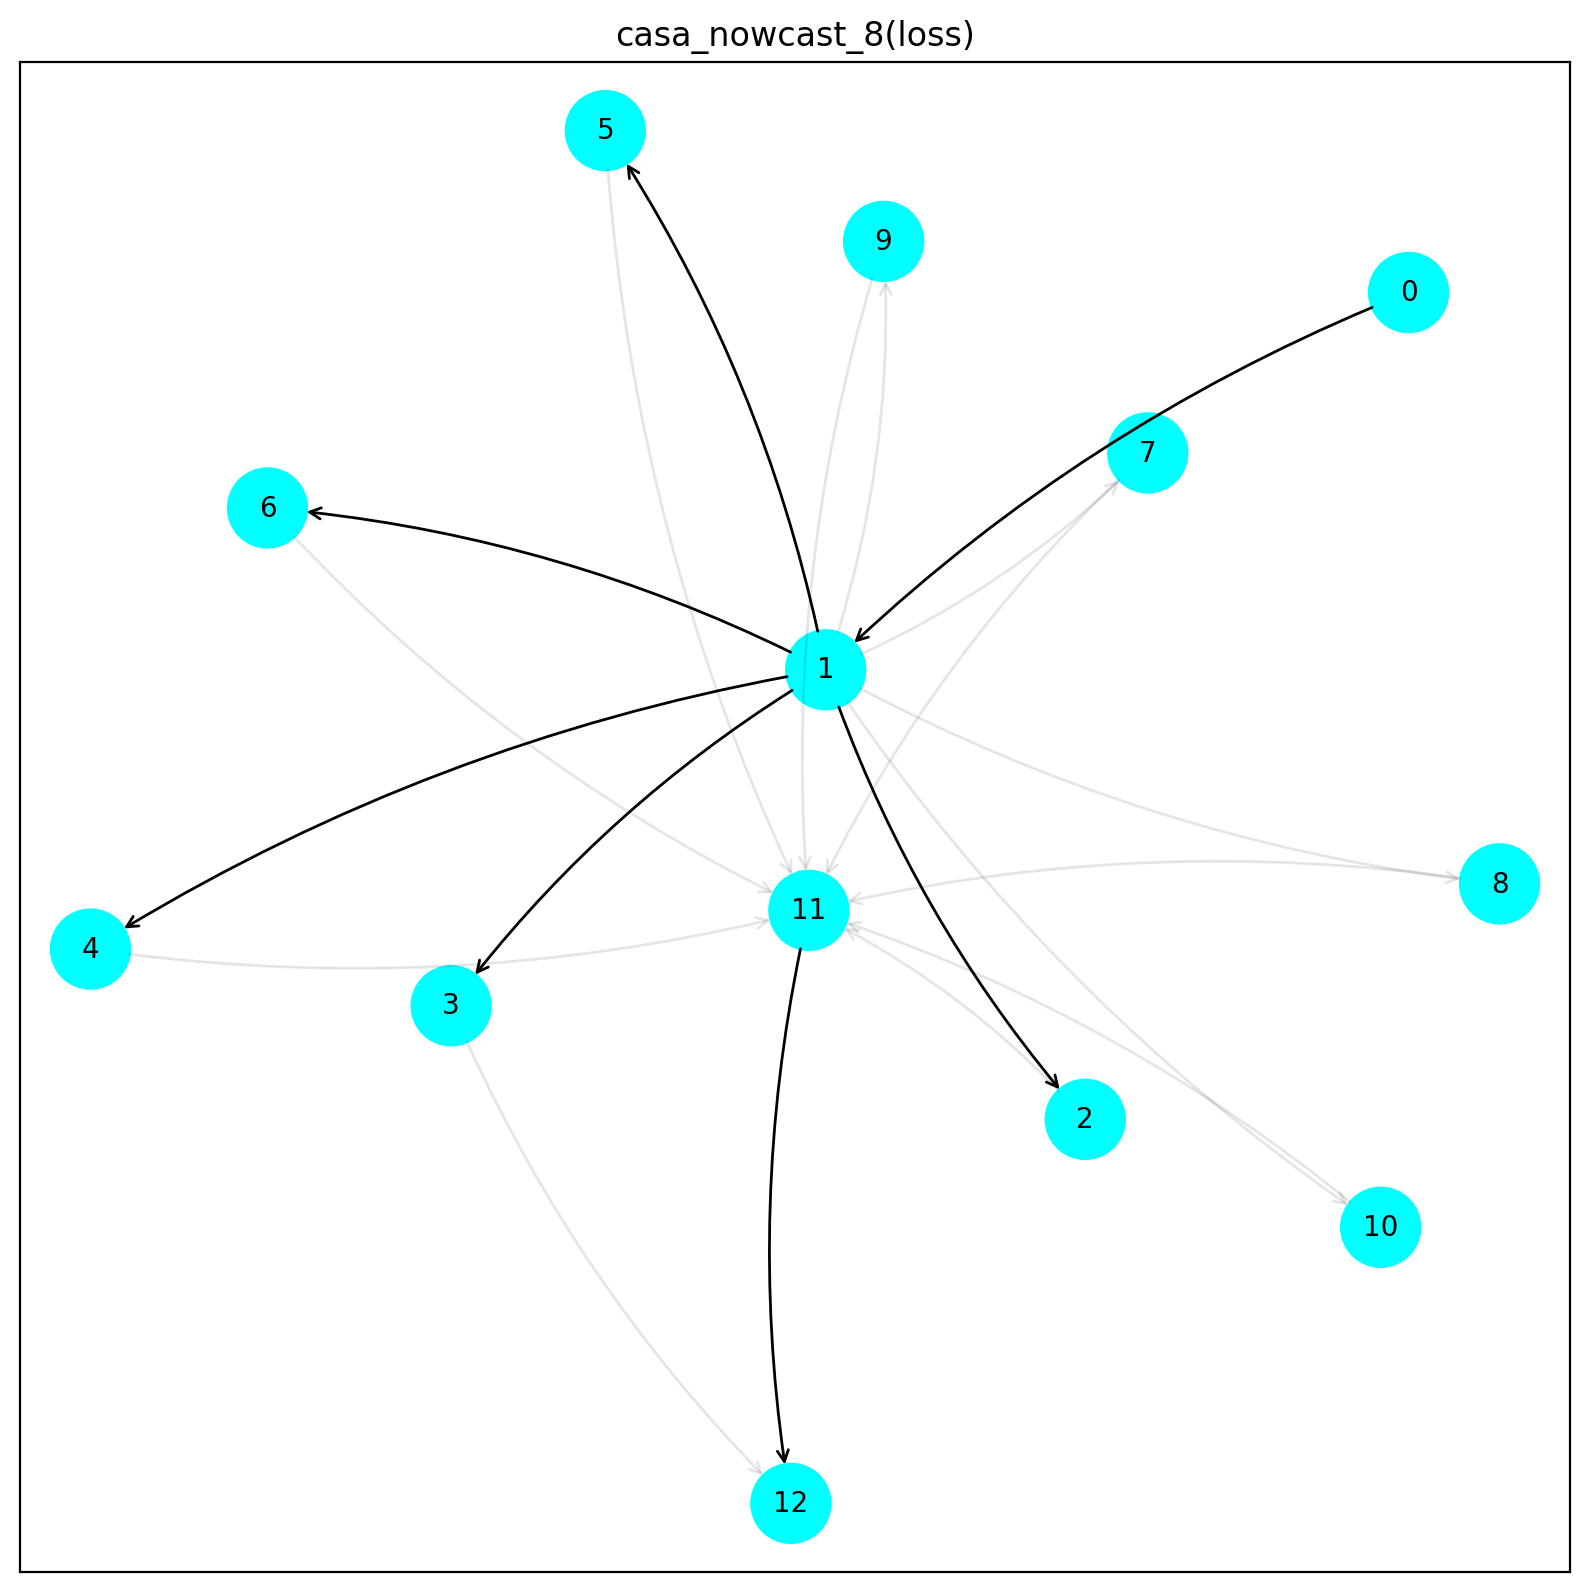

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 265.91it/s]


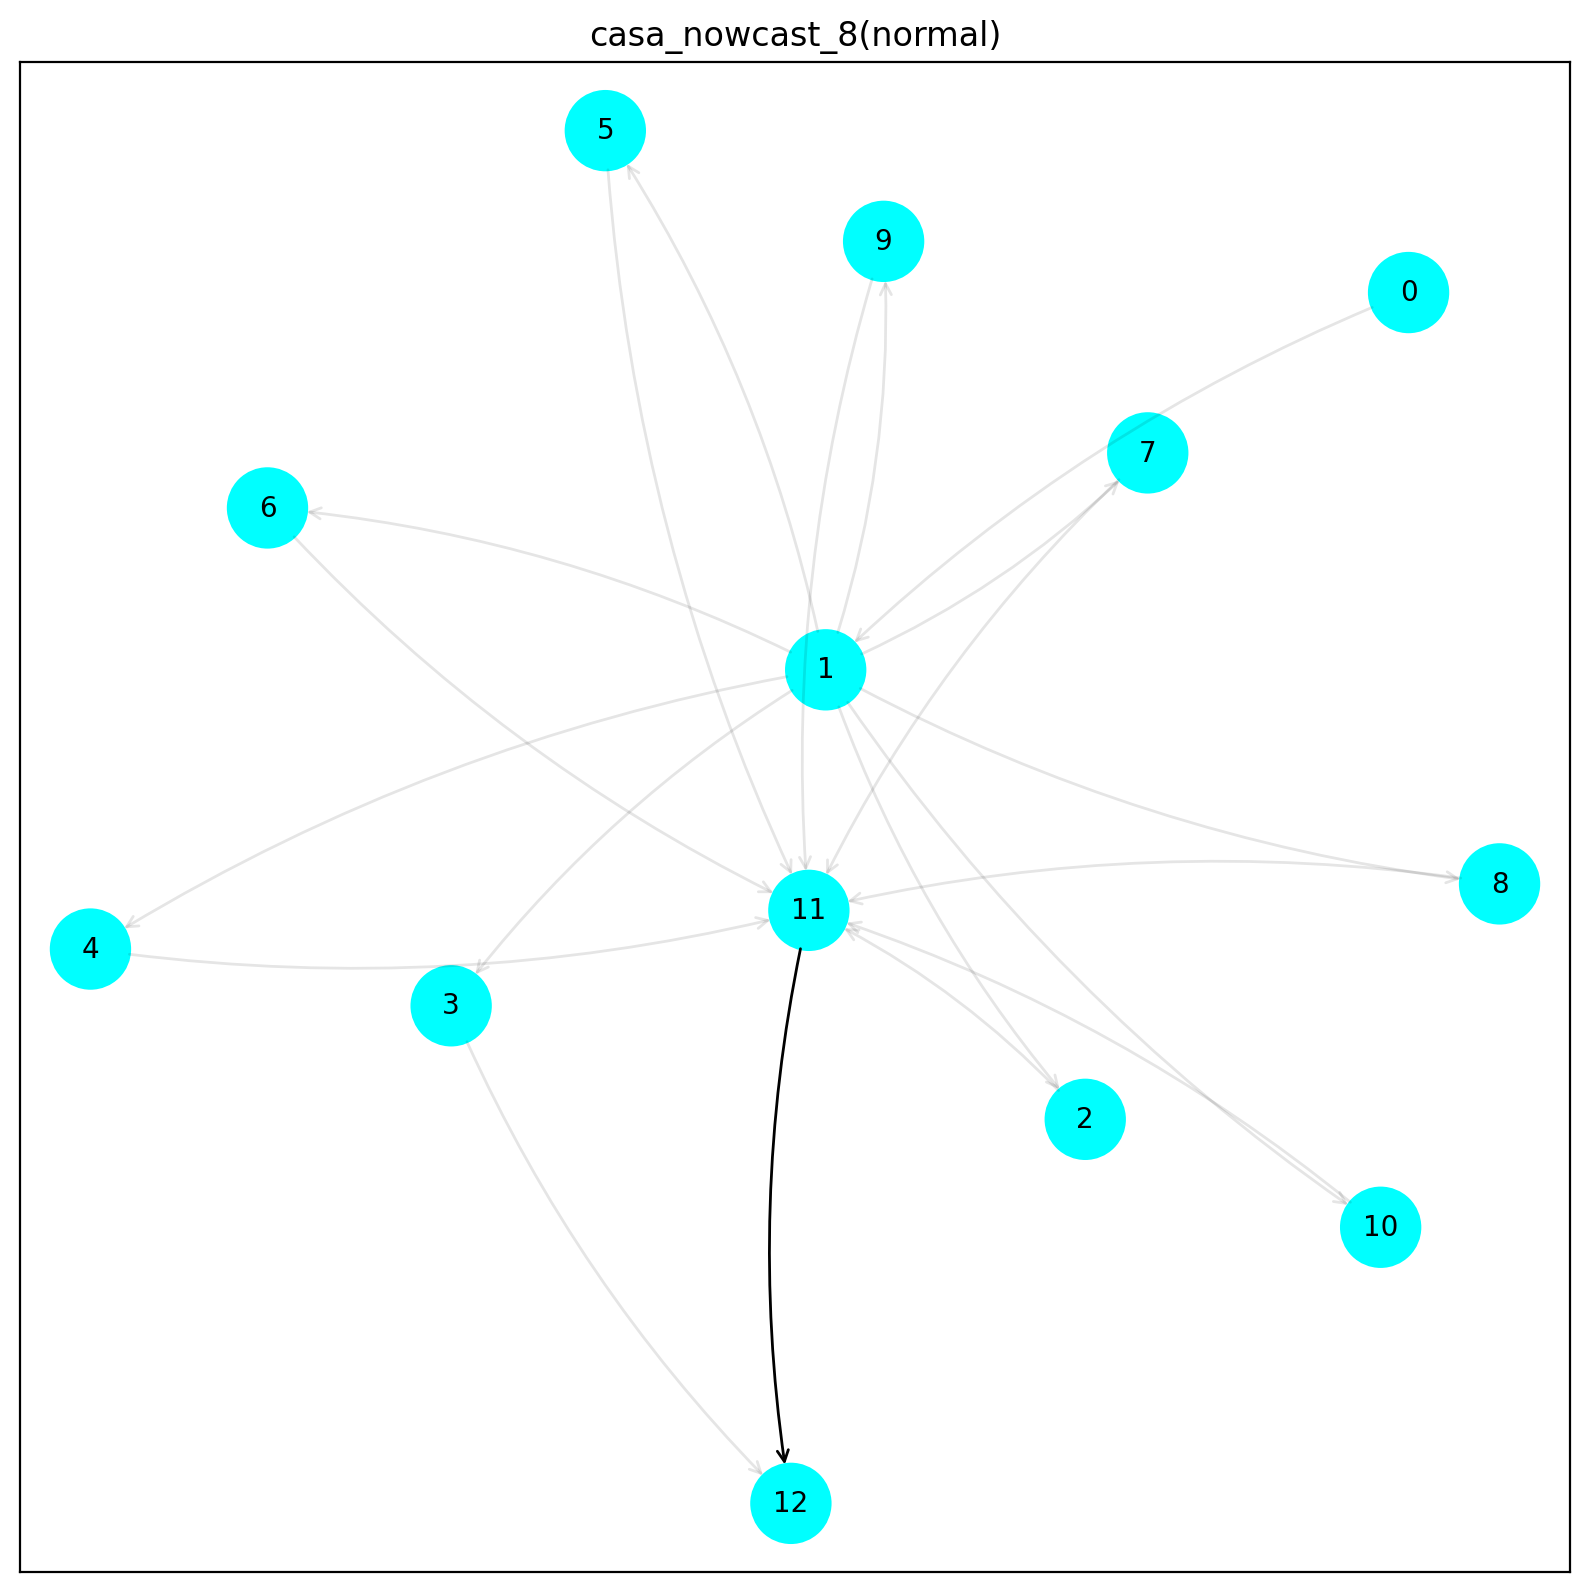

In [5]:
explain_mod('casa_nowcast_8', data_read=1)

WF wind_clustering 
 Acc: 0.5170731707317073


Explain graph: 100%|██████████| 200/200 [00:00<00:00, 288.02it/s]


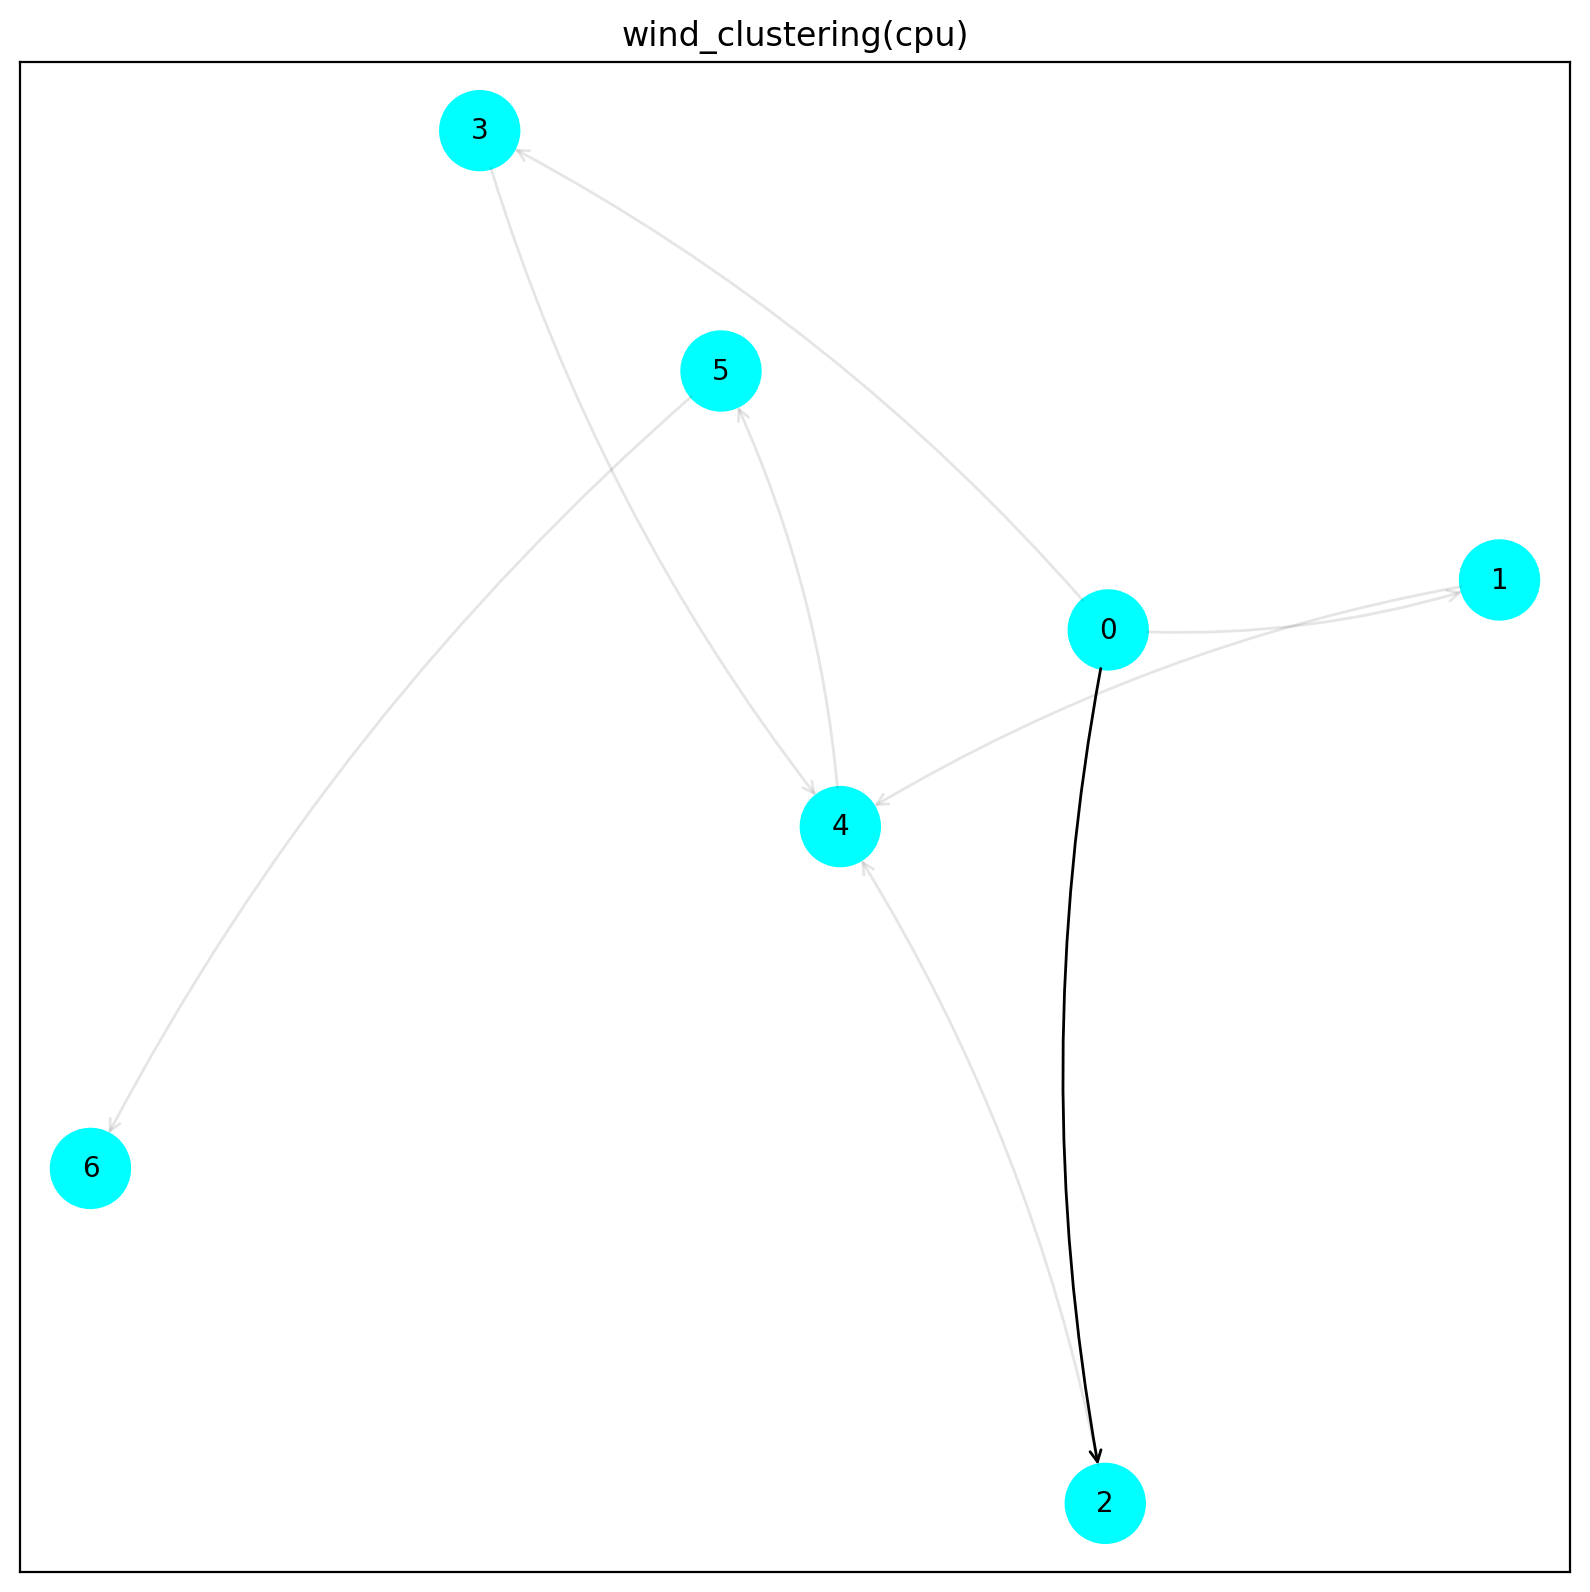

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 285.73it/s]


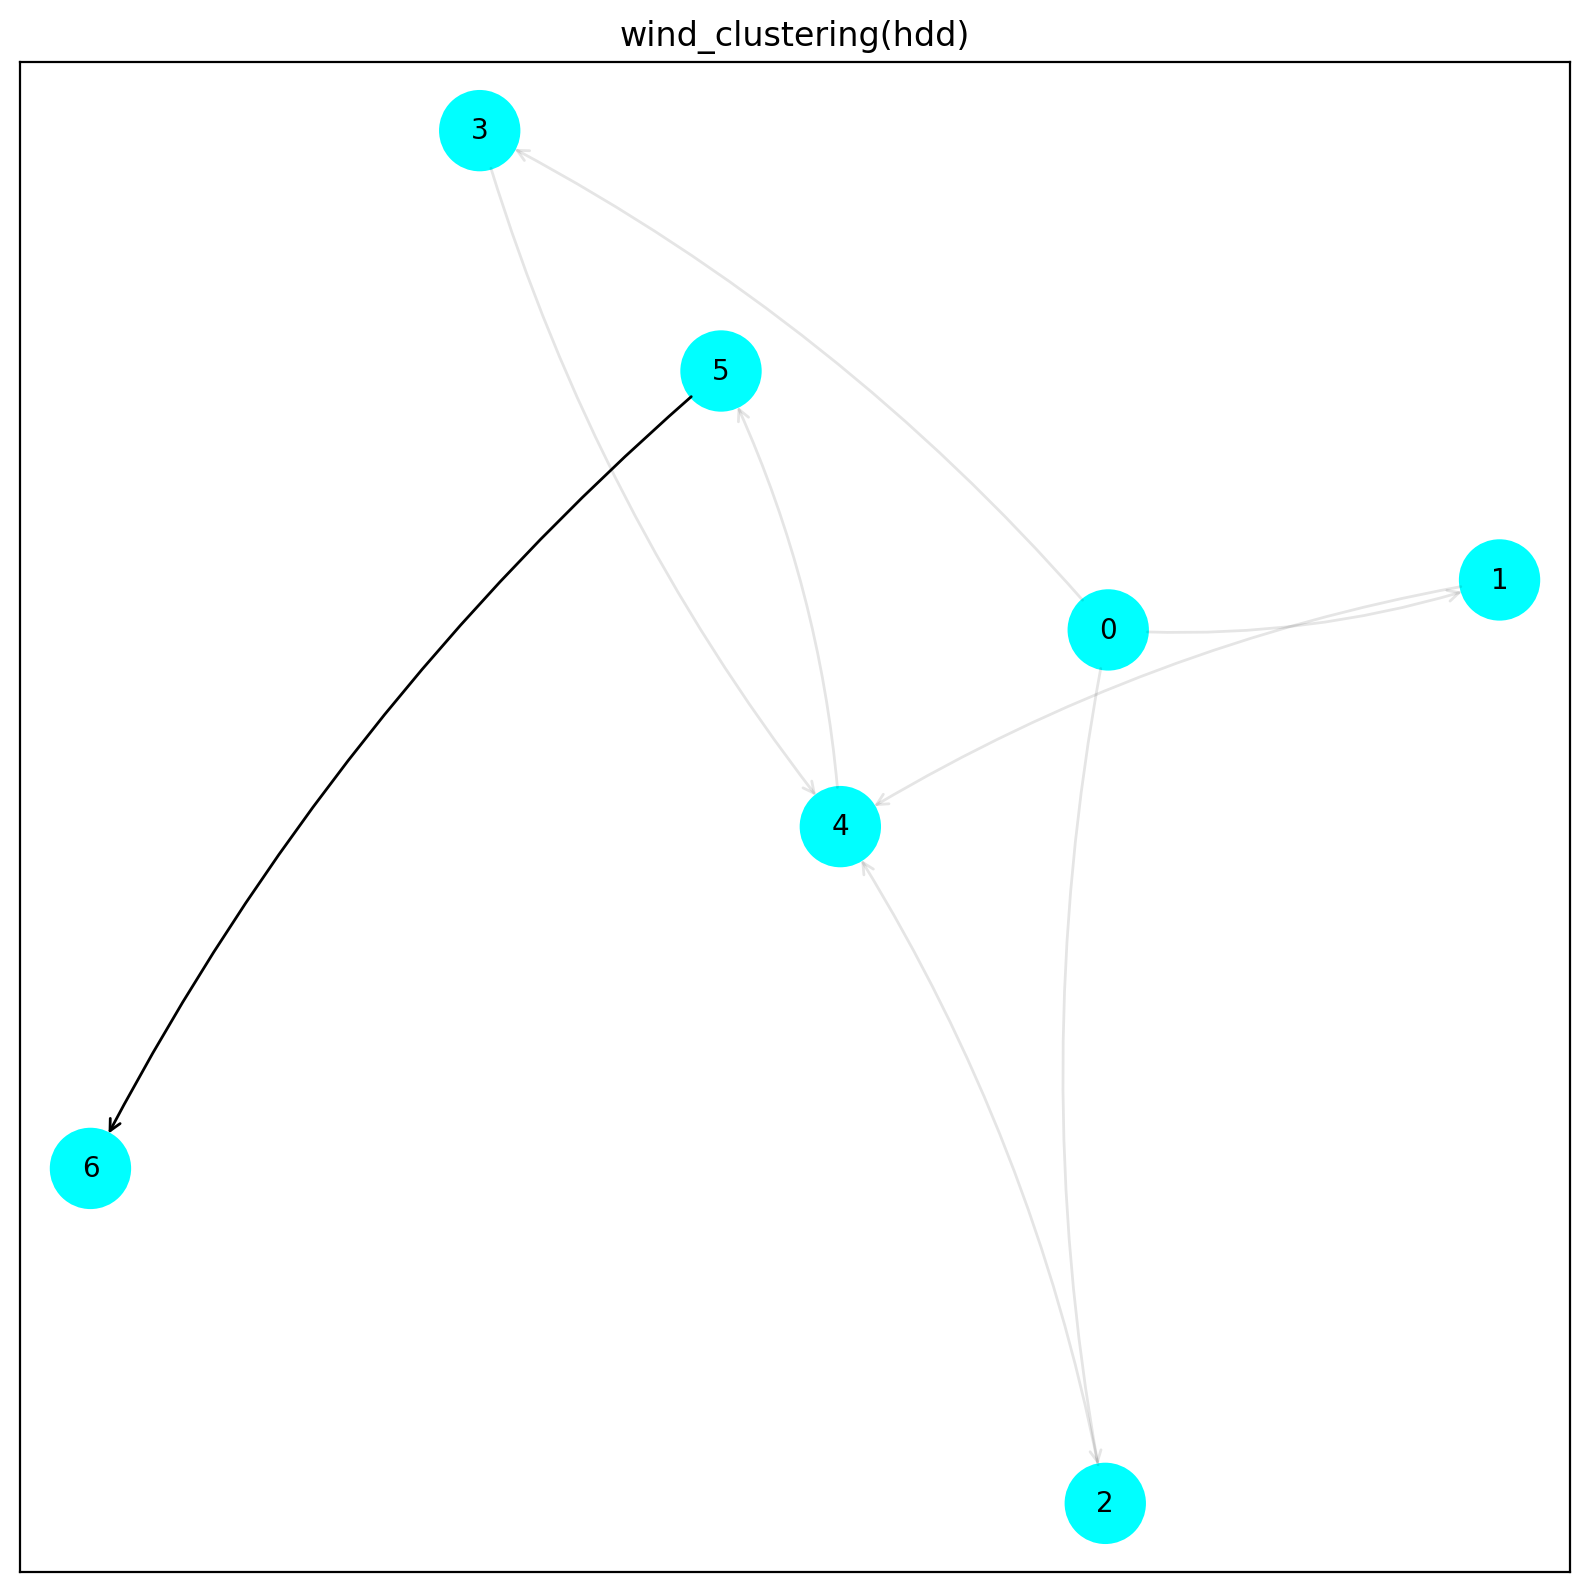

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 288.59it/s]


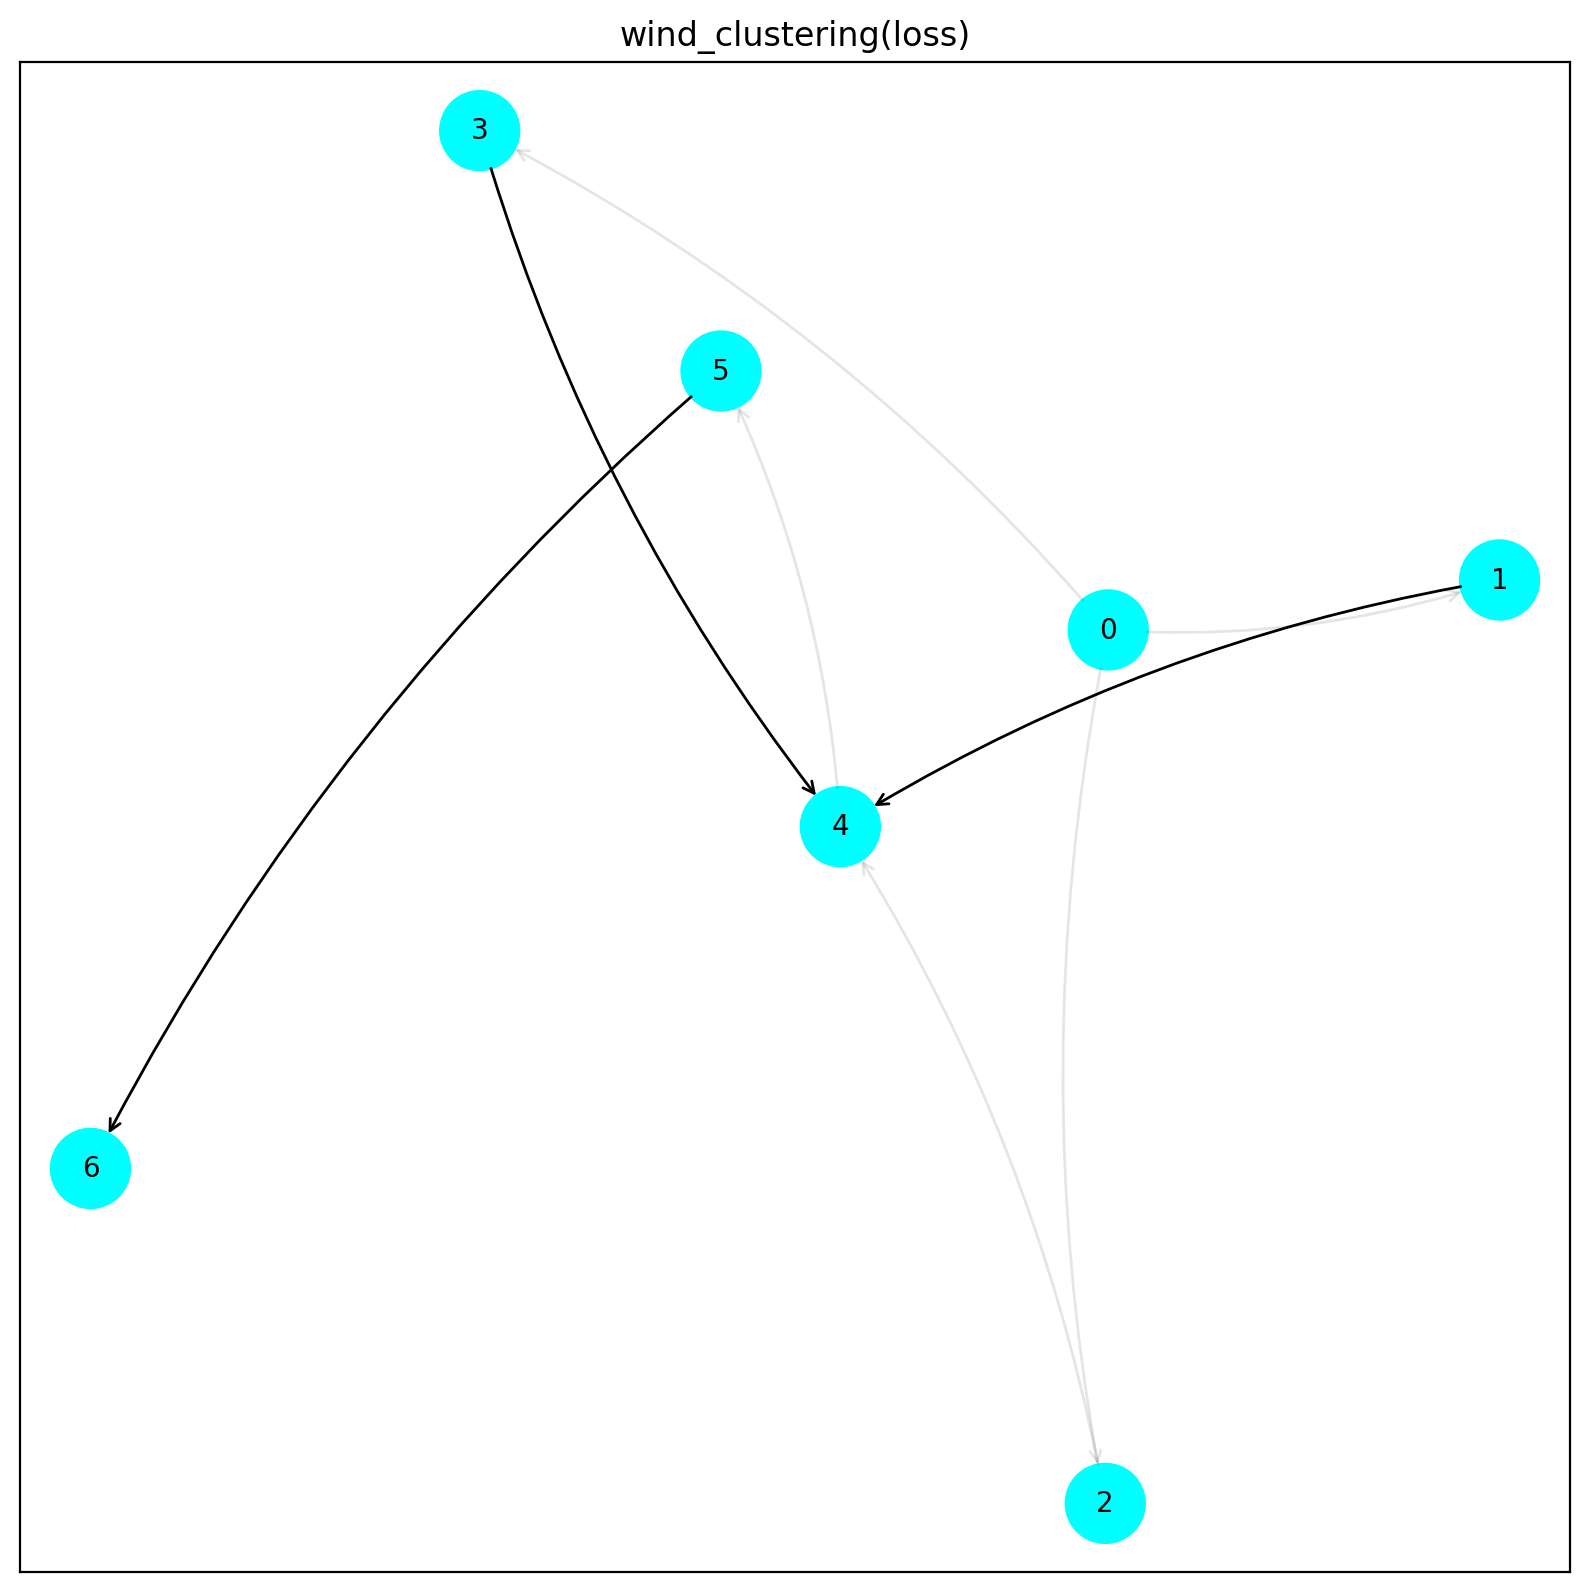

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 290.45it/s]


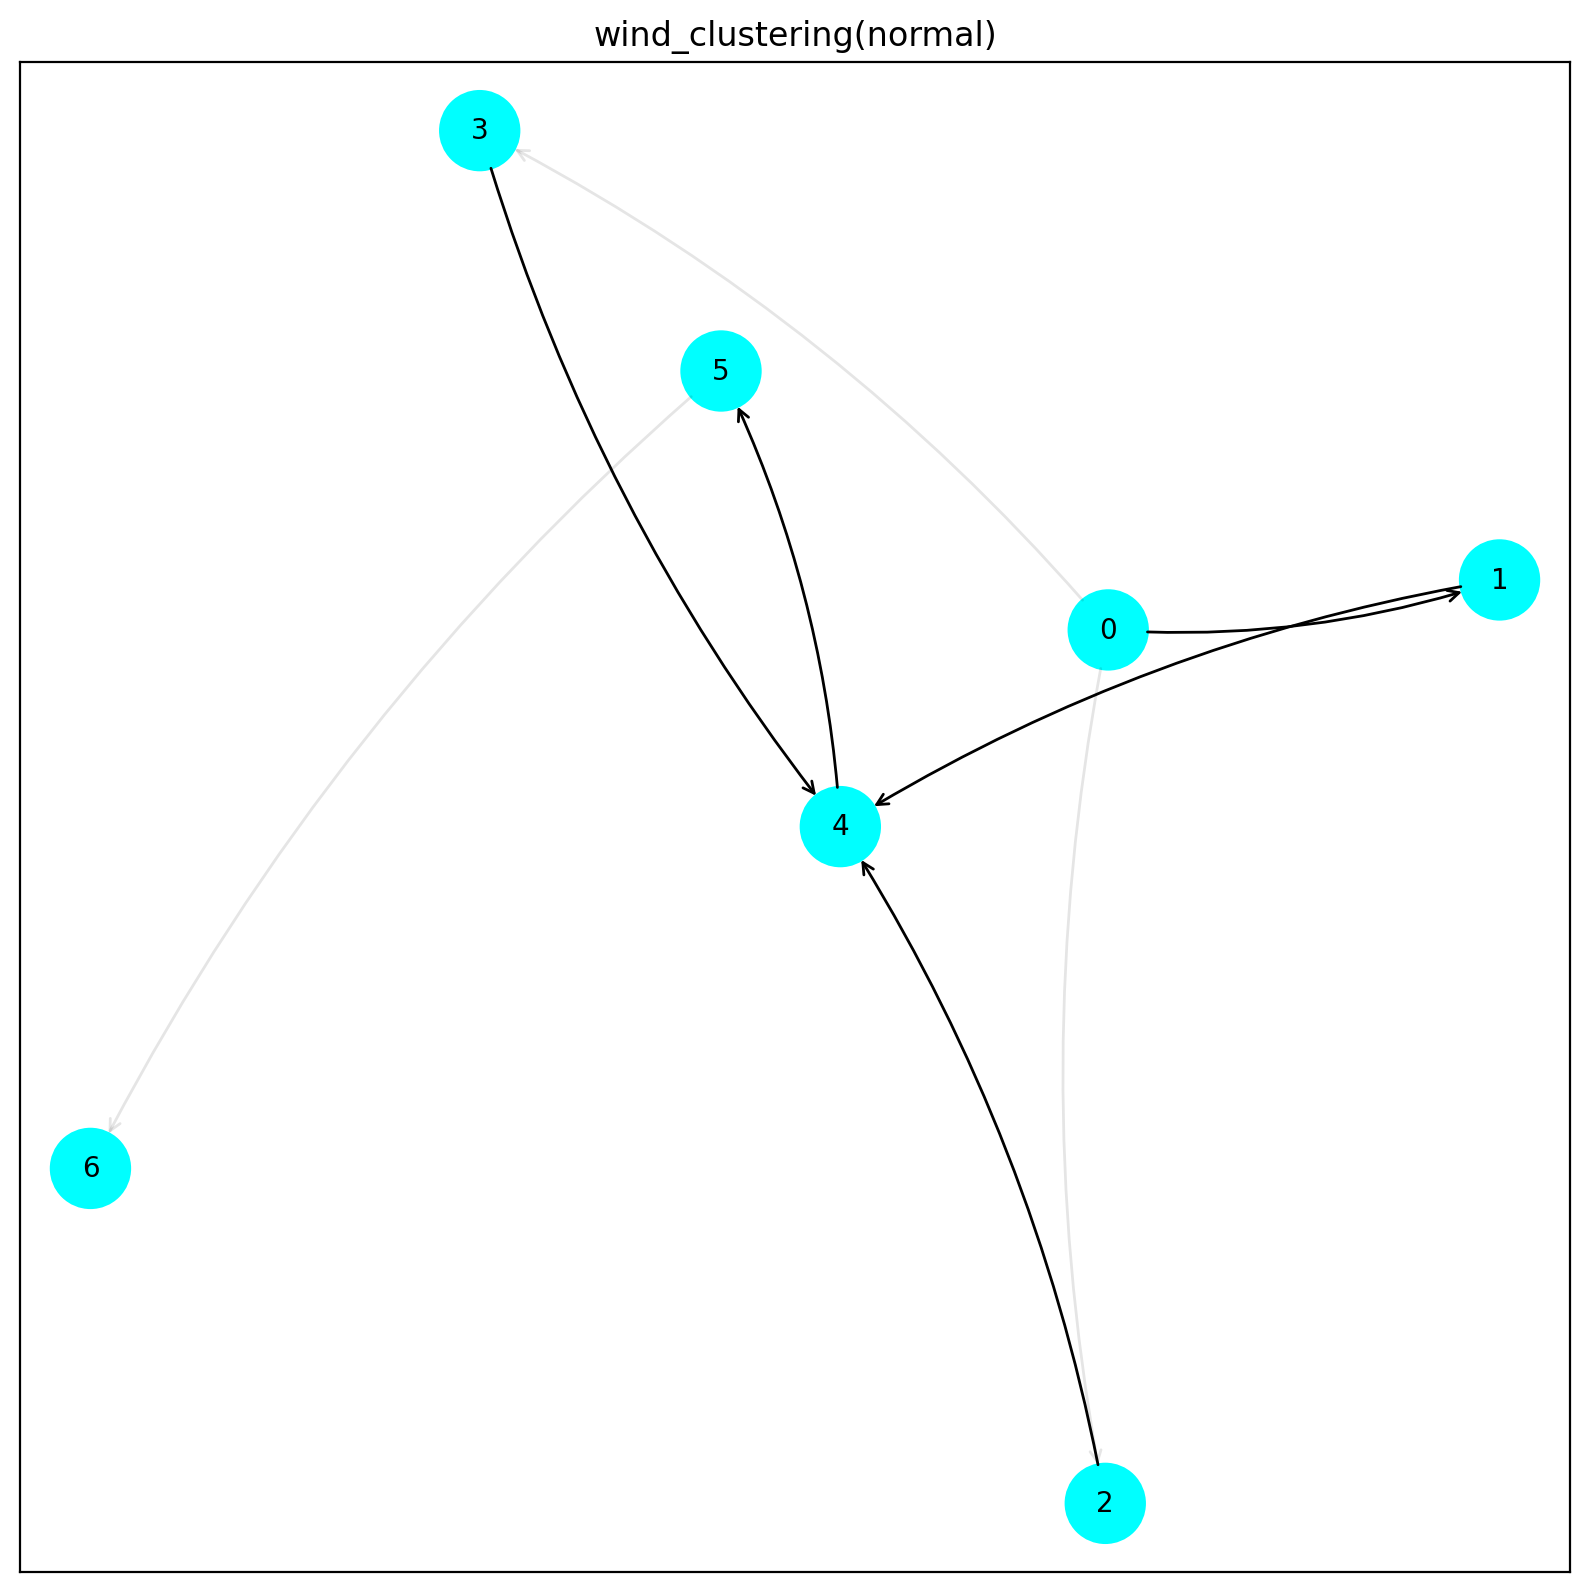

In [6]:
explain_mod('wind_clustering', data_read=1)

WF wind_noclustering 
 Acc: 0.6005046257359126


Explain graph: 100%|██████████| 200/200 [00:00<00:00, 281.98it/s]


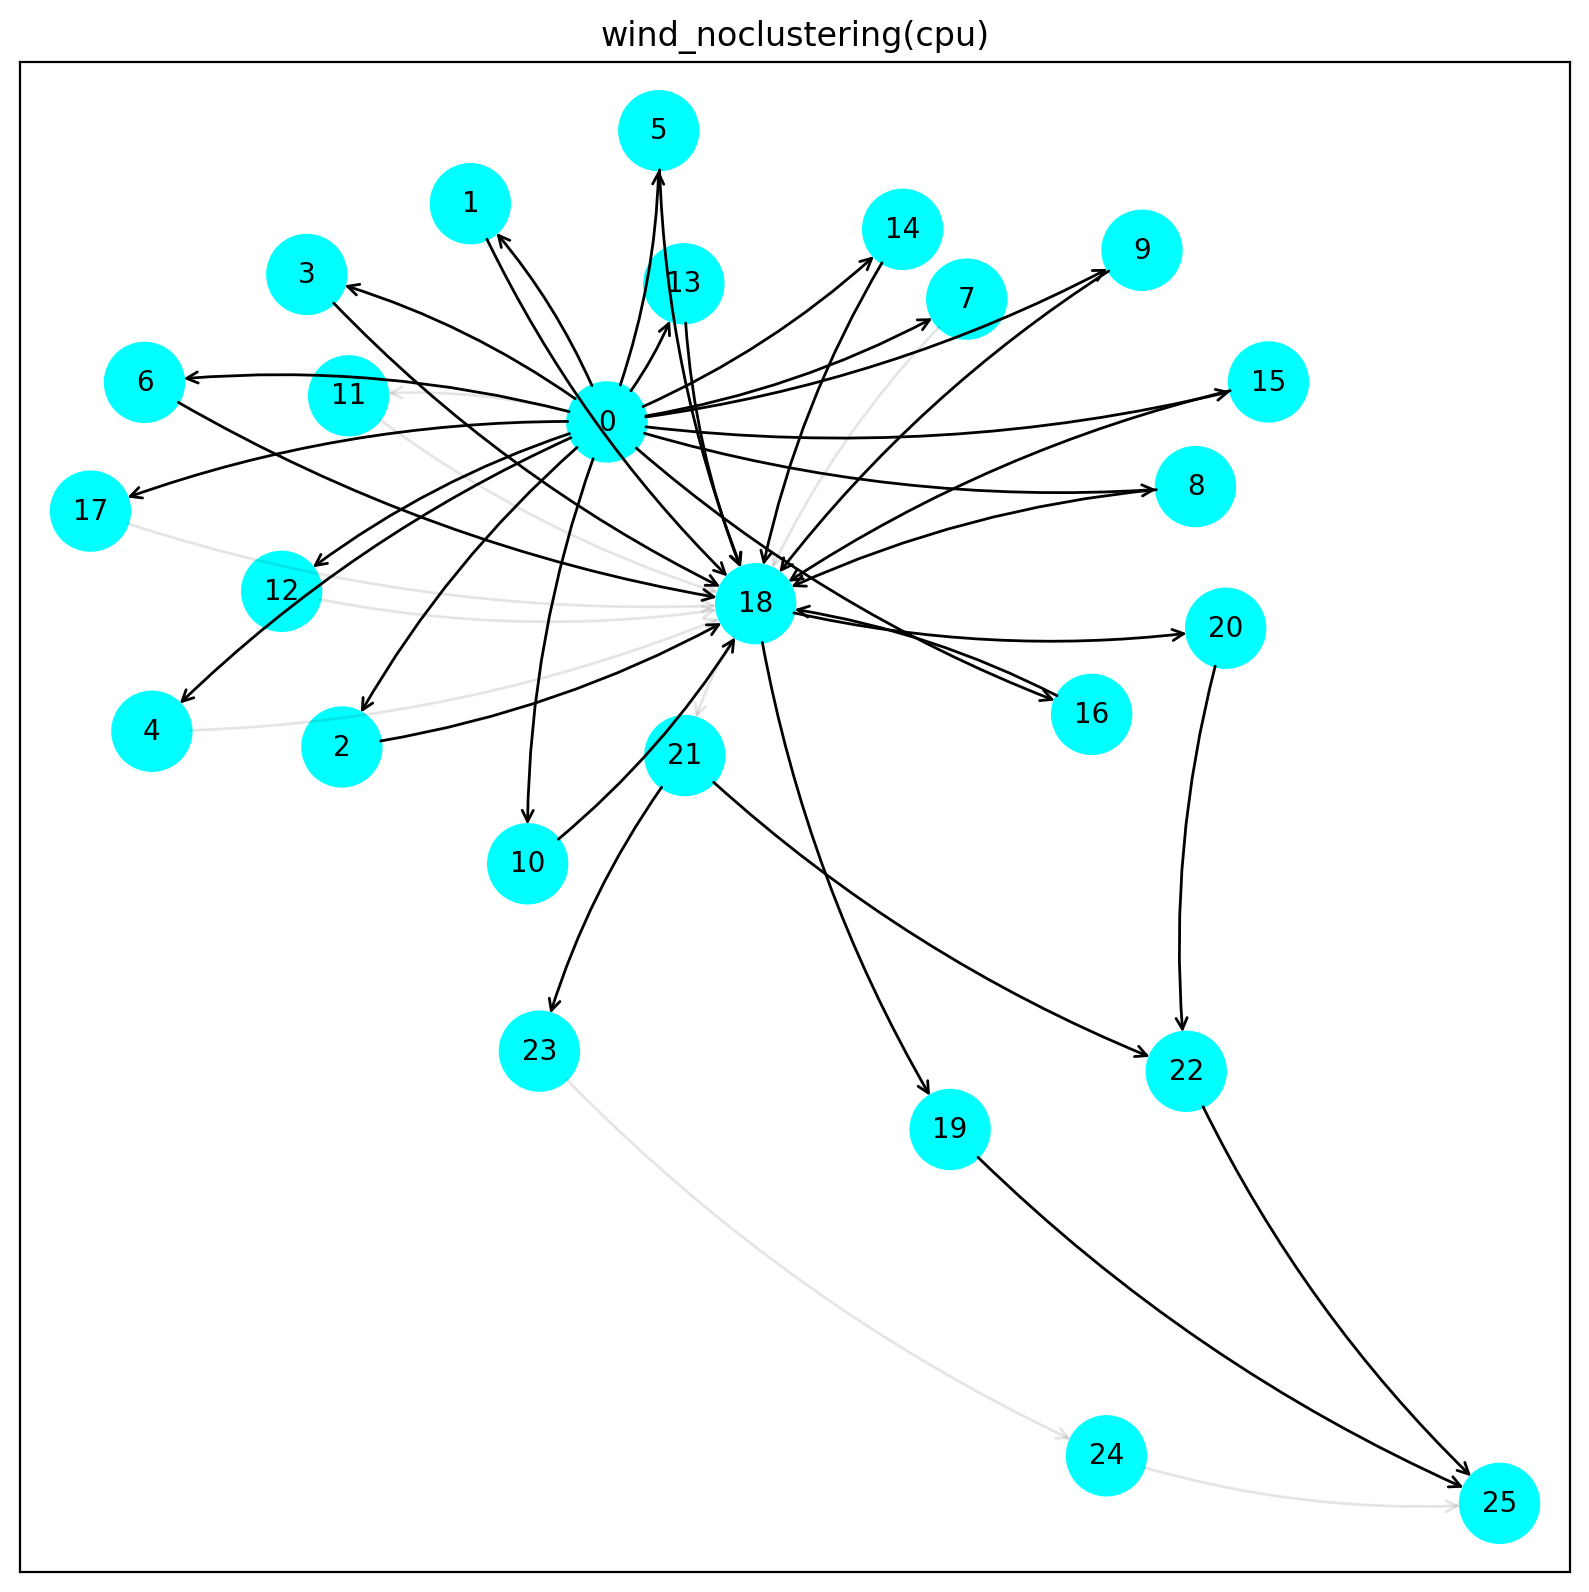

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 279.73it/s]


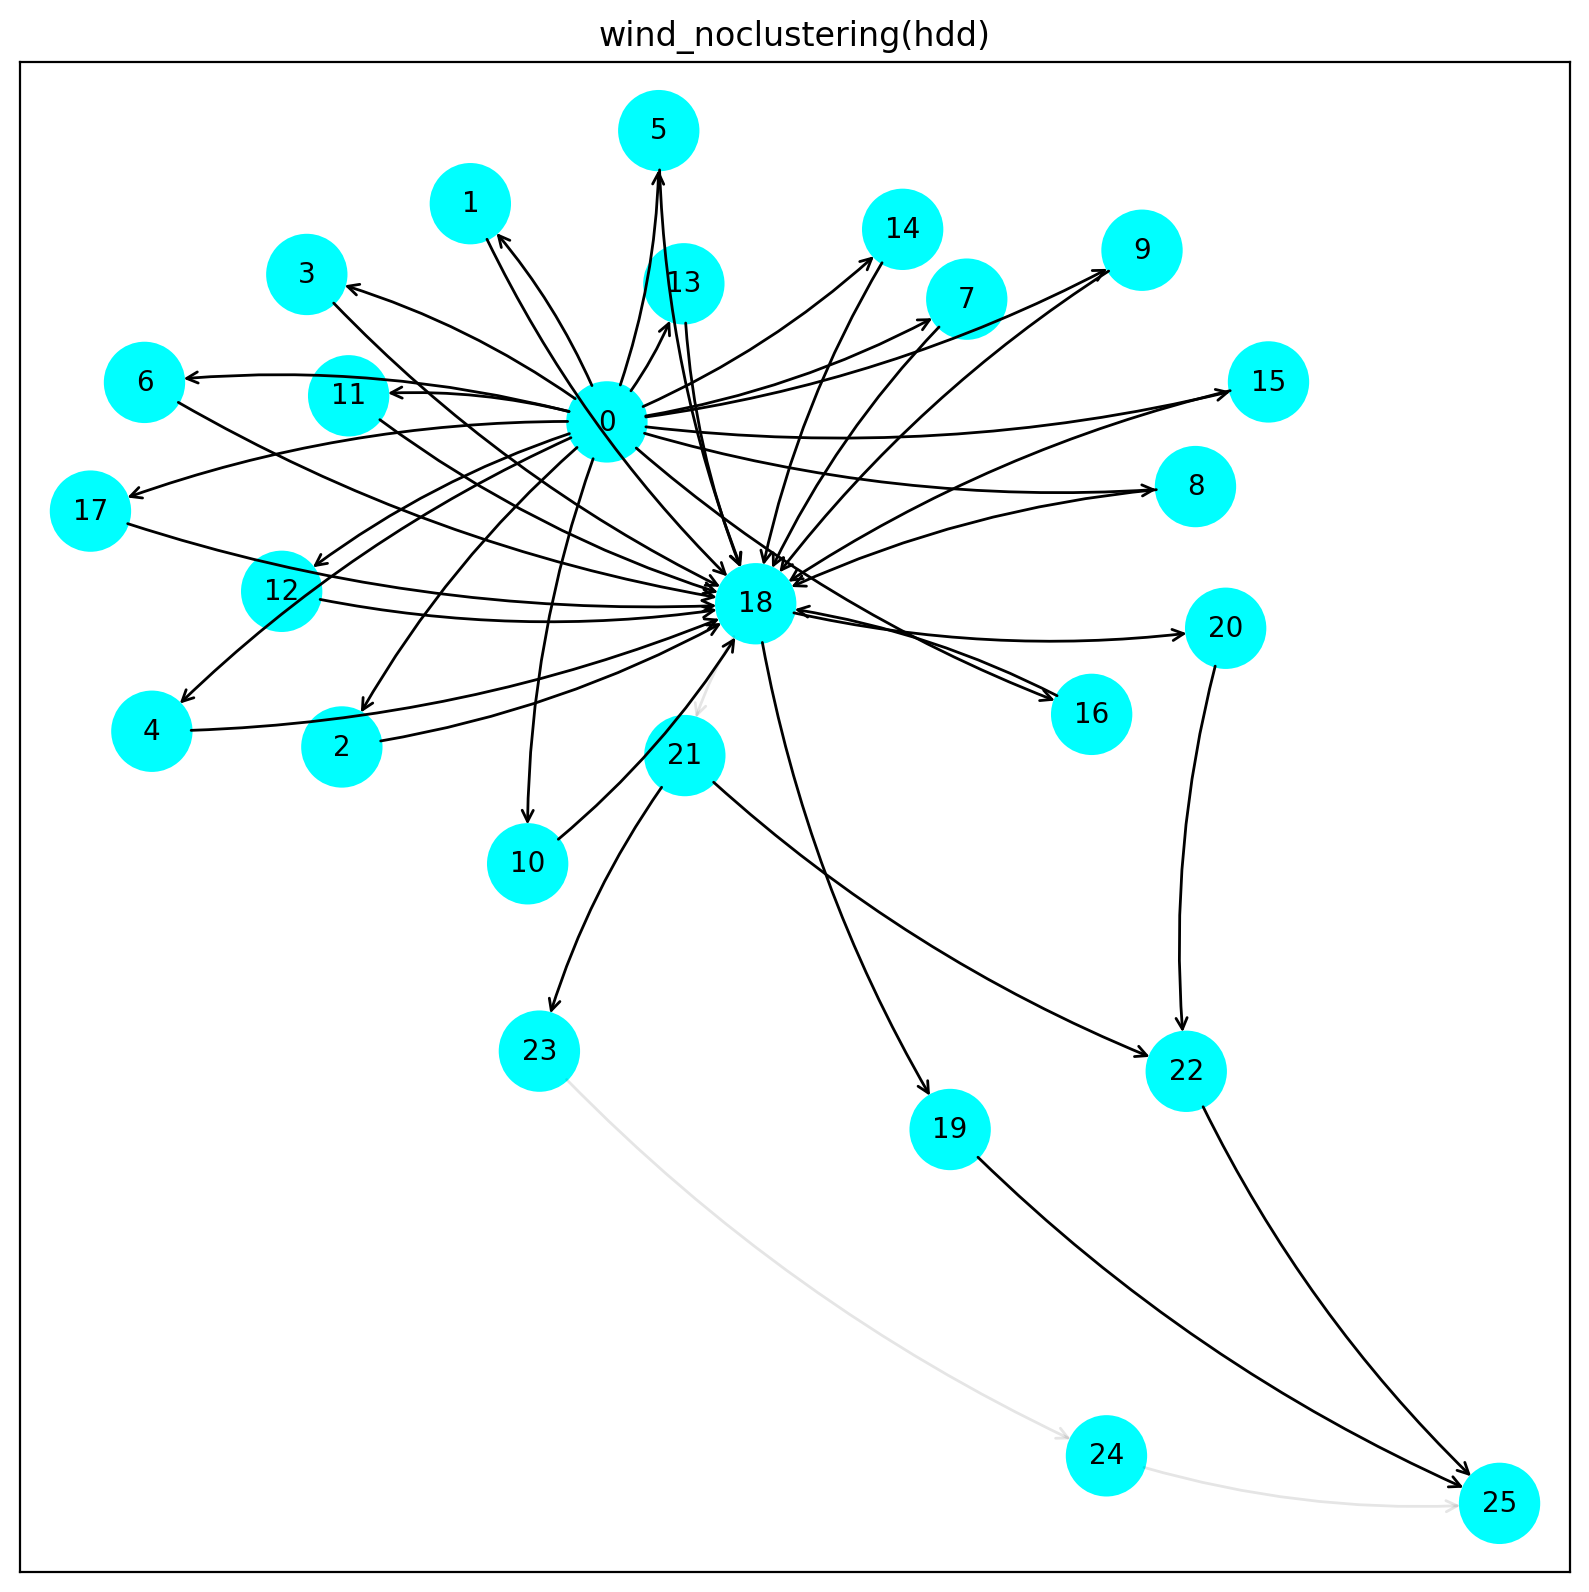

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 278.67it/s]


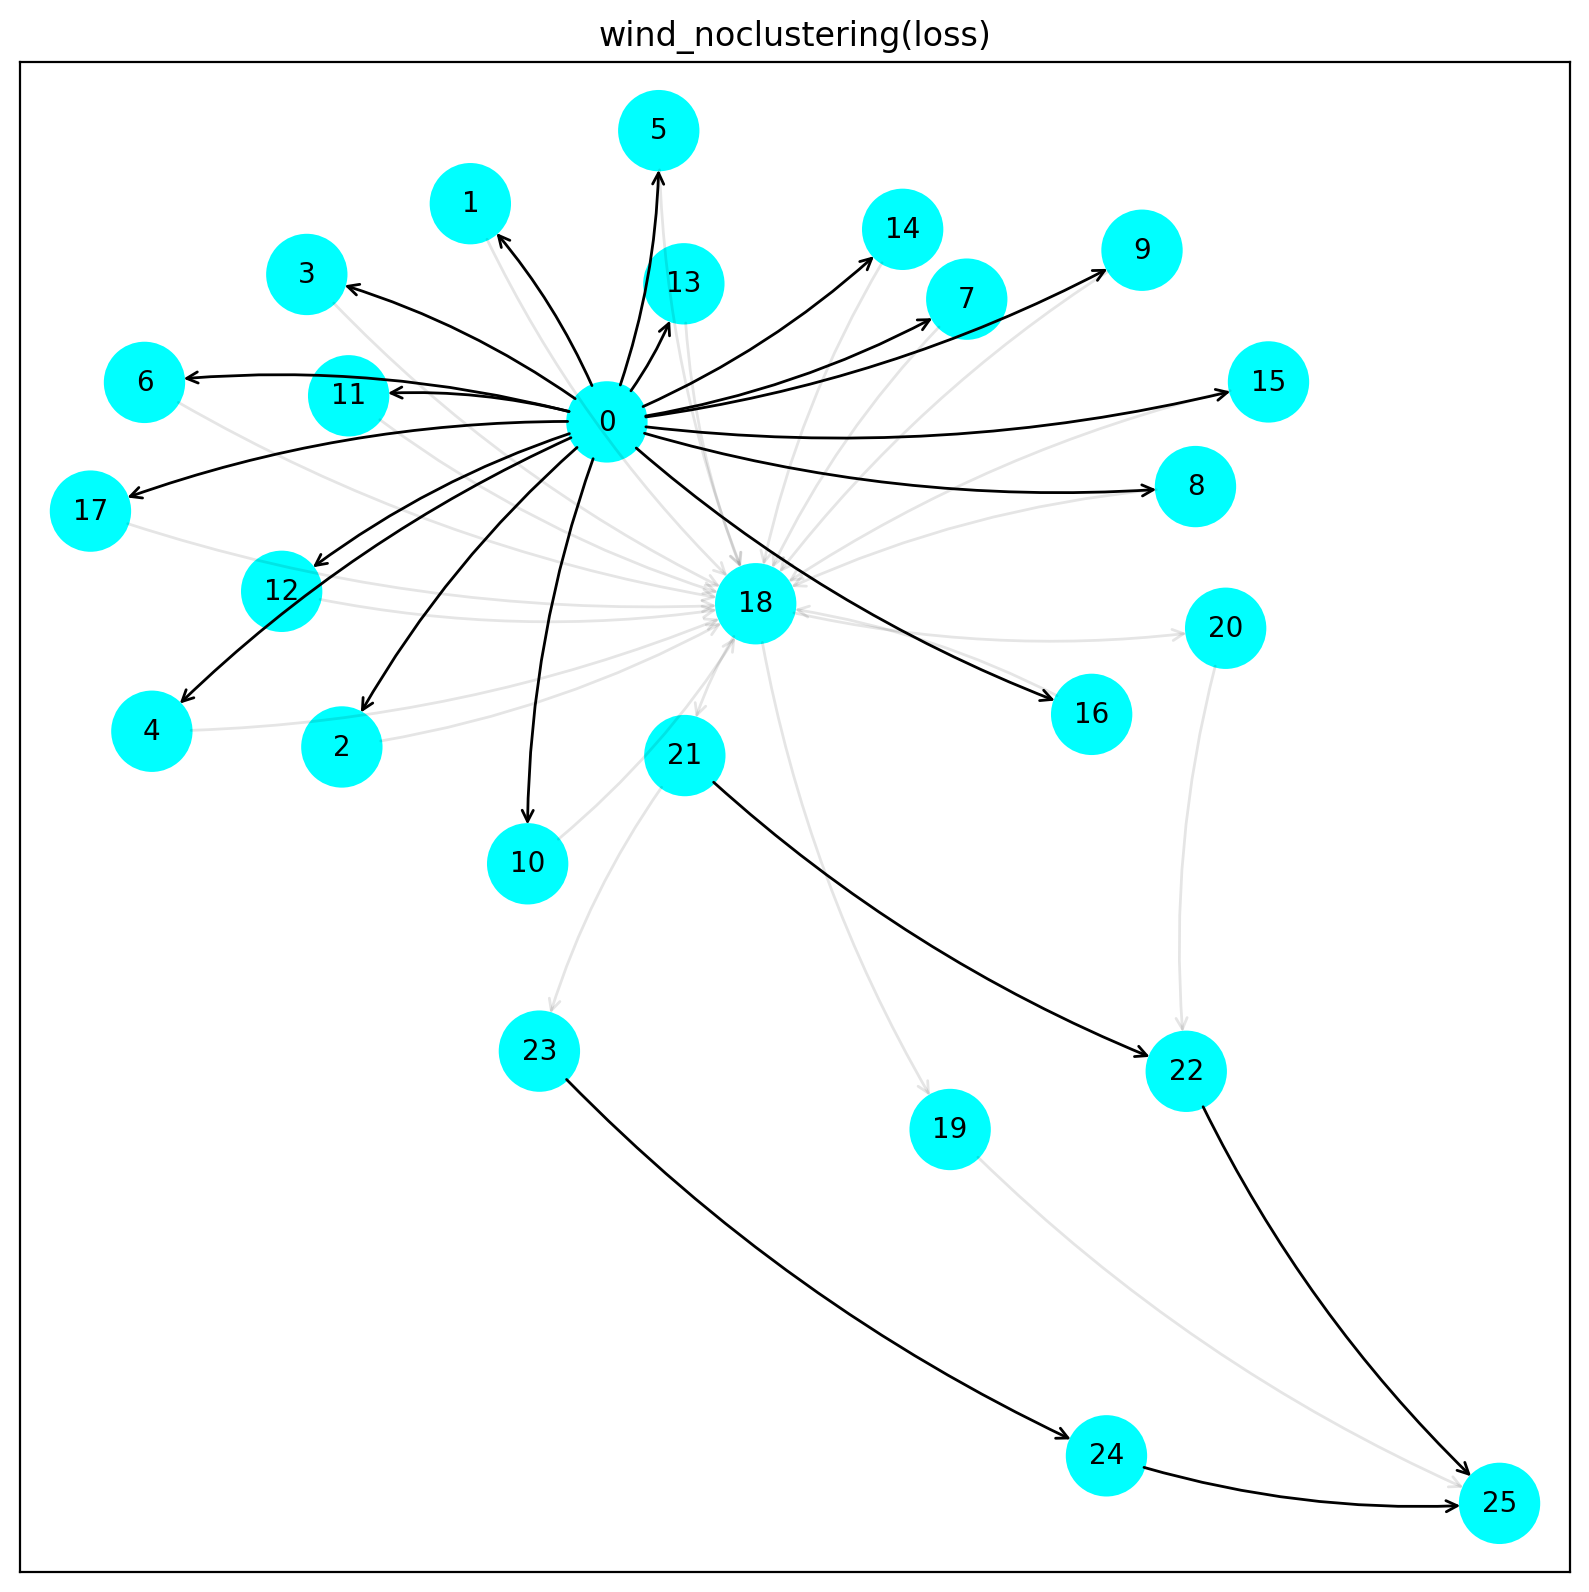

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 278.62it/s]


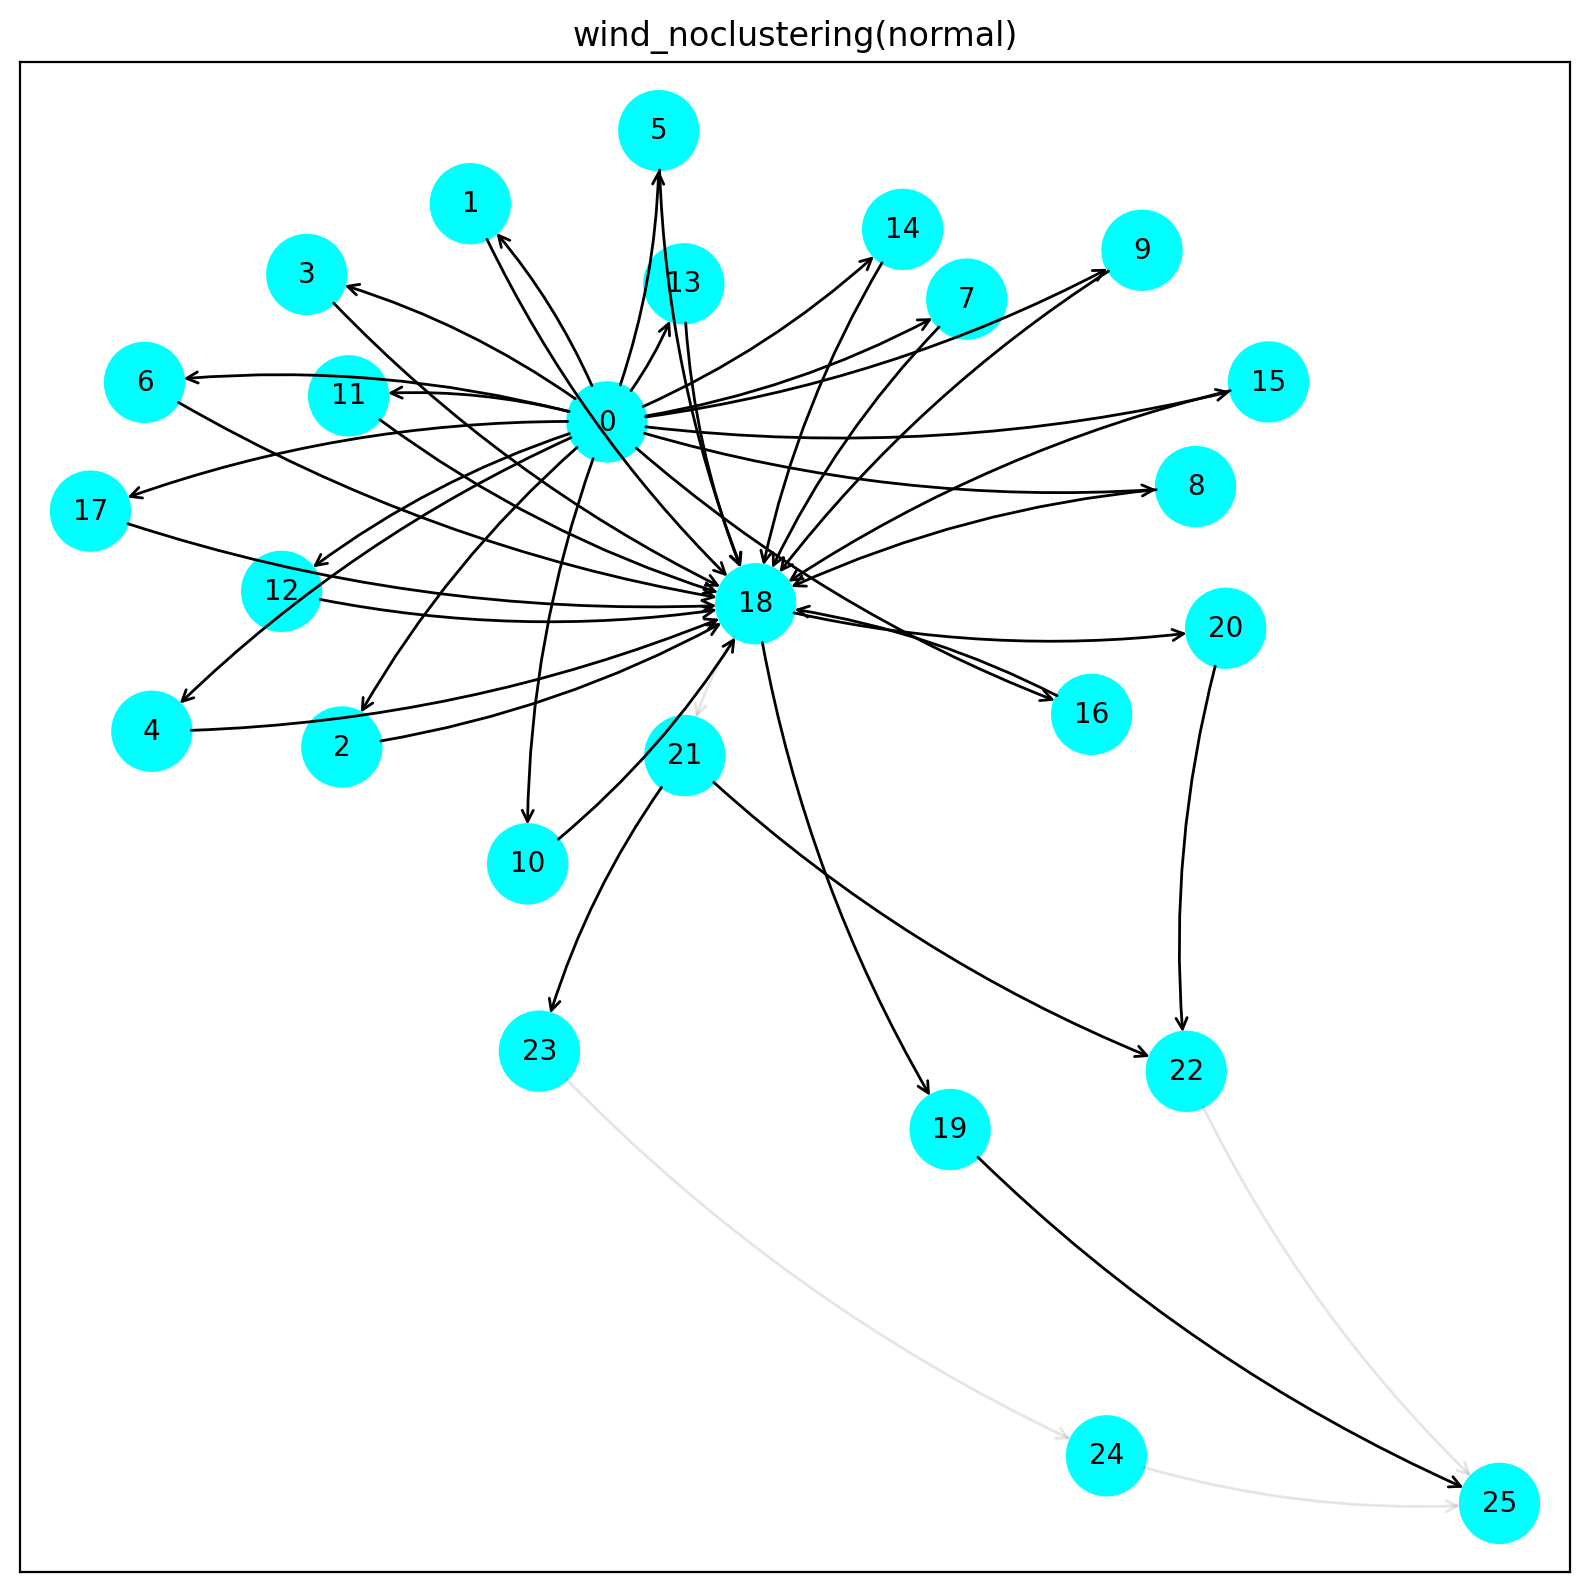

In [7]:
explain_mod('wind_noclustering', data_read=1)